In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read train and test data
travel_train = pd.read_csv('/content/drive/MyDrive/DSML/Hackathon/Traveldata_train_.csv')
survey_train = pd.read_csv('/content/drive/MyDrive/DSML/Hackathon/Surveydata_train_.csv')
travel_test = pd.read_csv('/content/drive/MyDrive/DSML/Hackathon/Traveldata_test_.csv')
survey_test = pd.read_csv('/content/drive/MyDrive/DSML/Hackathon/Surveydata_test_.csv')

In [ ]:
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#EDA - Exploratory Data Analysis

In [ ]:
print("travel_train shape = ", travel_train.shape)
print("survey_train shape = ", survey_train.shape)
print("travel_test shape = ", travel_test.shape)
print("survey_test shape = ", survey_test.shape)

travel_train shape =  (94379, 9)
survey_train shape =  (94379, 17)
travel_test shape =  (35602, 9)
survey_test shape =  (35602, 16)


In [ ]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
travel_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [ ]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00,NaN,Business,272,0.00,5.00
1,98800002,Male,Loyal Customer,48.00,Personal Travel,Eco,2200,9.00,0.00
2,98800003,Female,Loyal Customer,43.00,Business Travel,Business,1061,77.00,119.00
3,98800004,Female,Loyal Customer,44.00,Business Travel,Business,780,13.00,18.00
4,98800005,Female,Loyal Customer,50.00,Business Travel,Business,1981,0.00,0.00


In [ ]:
travel_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.00,Business Travel,Business,1357,83.00,125.00
94375,98894376,Male,Loyal Customer,44.00,Business Travel,Business,592,5.00,11.00
94376,98894377,Male,NaN,63.00,Business Travel,Business,2794,0.00,0.00
94377,98894378,Male,Loyal Customer,16.00,Personal Travel,Eco,2744,0.00,0.00
94378,98894379,Male,Loyal Customer,54.00,NaN,Eco,2107,28.00,28.00


In [ ]:
travel_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.00,98847190.00,27245.01,98800001.00,98823595.50,98847190.00,98870784.50,98894379.00
Age,94346.00,39.42,15.12,7.00,27.00,40.00,51.00,85.00
Travel_Distance,94379.00,1978.89,1027.96,50.00,1359.00,1923.00,2538.00,6951.00
Departure_Delay_in_Mins,94322.00,14.65,38.14,0.00,0.00,0.00,12.00,1592.00
Arrival_Delay_in_Mins,94022.00,15.01,38.44,0.00,0.00,0.00,13.00,1584.00


In [ ]:
survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
survey_train.isna().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
survey_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [ ]:
train = pd.merge(travel_train, survey_train, on='ID')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.00,NaN,Business,272,0.00,5.00,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.00,Personal Travel,Eco,2200,9.00,0.00,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.00,Business Travel,Business,1061,77.00,119.00,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.00,Business Travel,Business,780,13.00,18.00,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.00,Business Travel,Business,1981,0.00,0.00,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
test = pd.merge(travel_test, survey_test, on='ID')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.00,Business Travel,Business,532,0.00,0.00,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.00,Business Travel,Business,1425,9.00,28.00,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.00,Business Travel,Business,2832,0.00,0.00,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.00,Personal Travel,Eco,1352,0.00,0.00,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.00,Business Travel,Business,1610,17.00,0.00,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
test.isna().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
test_ID = test[['ID']]

In [ ]:
test_ID.head()

,ID
0,99900001
1,99900002
2,99900003
3,99900004
4,99900005


In [ ]:
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

In [ ]:
Y_train = train[['Overall_Experience']]

In [ ]:
Y_train.head()

,Overall_Experience
0,0
1,0
2,1
3,0
4,1


In [ ]:
train.drop('Overall_Experience', axis = 1, inplace = True)

#Univariate Analysis

In [ ]:
num_cols = list(train.select_dtypes(include = "number"))

In [ ]:
num_cols

['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

Age
skew = -0.00, mean = 39.42, median =  40.00


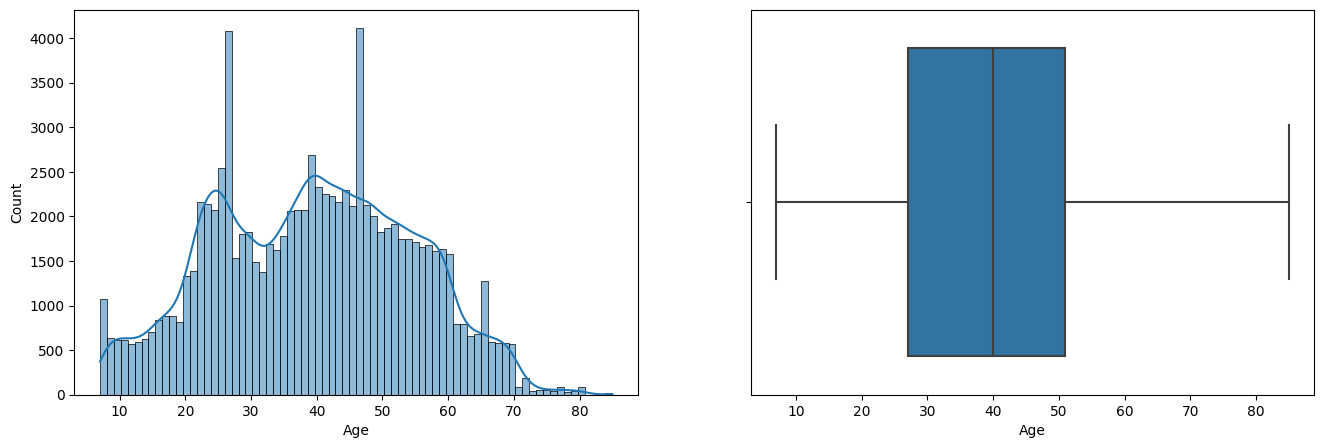

Travel_Distance
skew = 0.47, mean = 1978.89, median =  1923.00


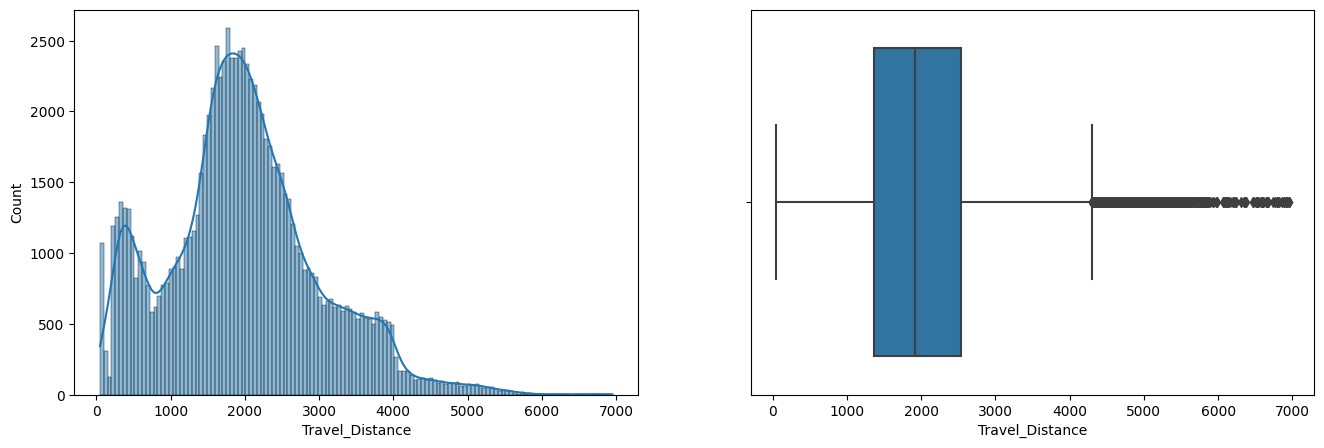

Departure_Delay_in_Mins
skew = 7.16, mean = 14.65, median =  0.00


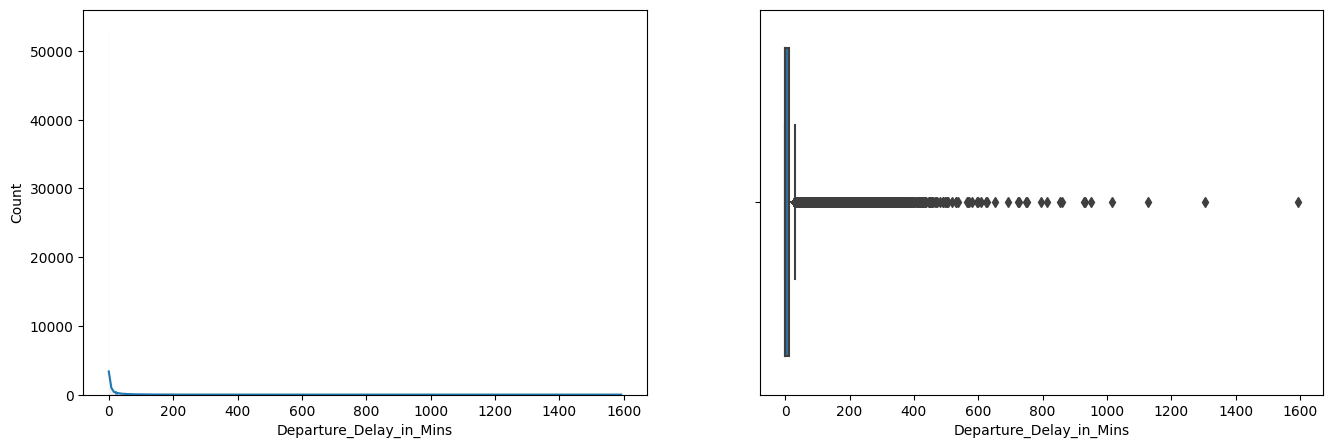

Arrival_Delay_in_Mins
skew = 6.98, mean = 15.01, median =  0.00


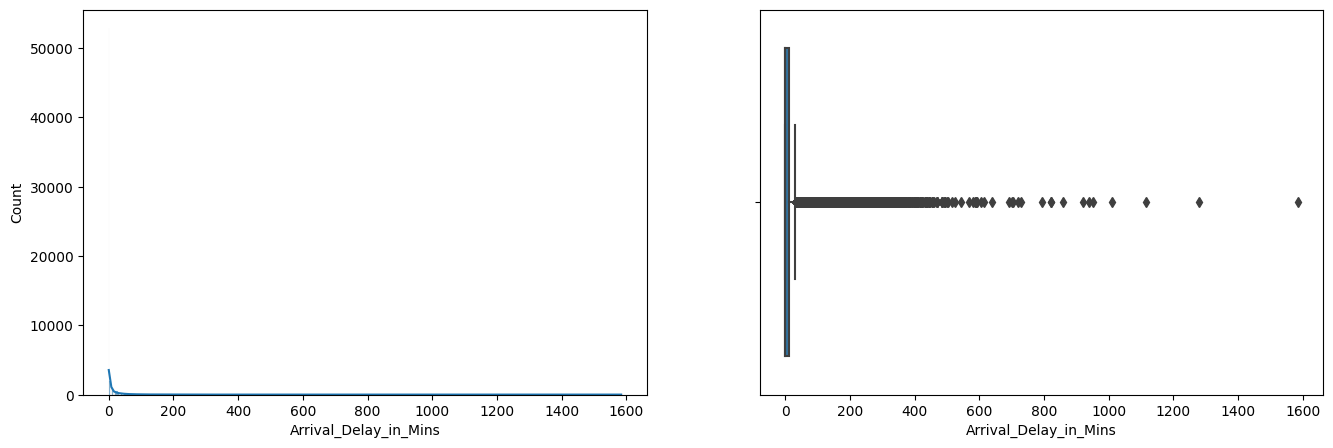

In [ ]:
for cols in num_cols:
  print(cols)
  print(f'skew = {train[cols].skew():.2f}, mean = {train[cols].mean():.2f}, median = {train[cols].median(): .2f}')
  plt.figure(figsize = (16,5))
  plt.subplot(1,2,1)
  sns.histplot(train, x = cols, kde = True)
  plt.subplot(1,2,2)
  sns.boxplot(train, x = cols)
  plt.show()

In [ ]:
cat_cols = list(train.select_dtypes(include= "object"))

In [ ]:
cat_cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

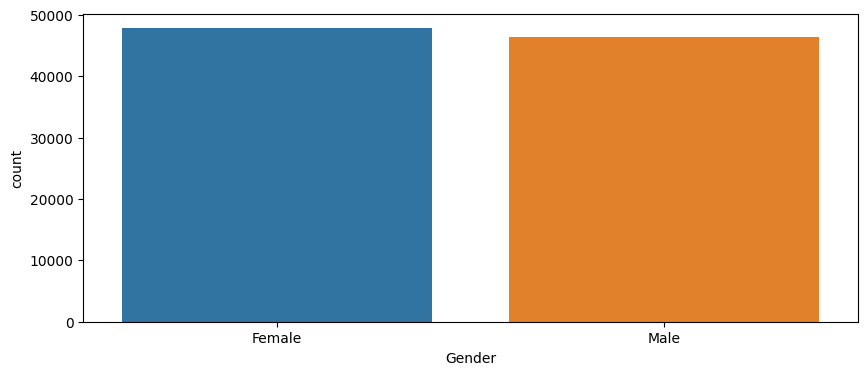

Female   0.51
Male     0.49
Name: Gender, dtype: float64
____________________


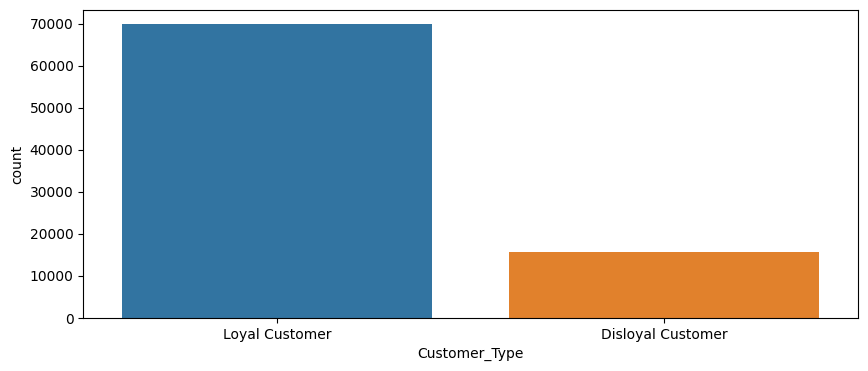

Loyal Customer      0.82
Disloyal Customer   0.18
Name: Customer_Type, dtype: float64
____________________


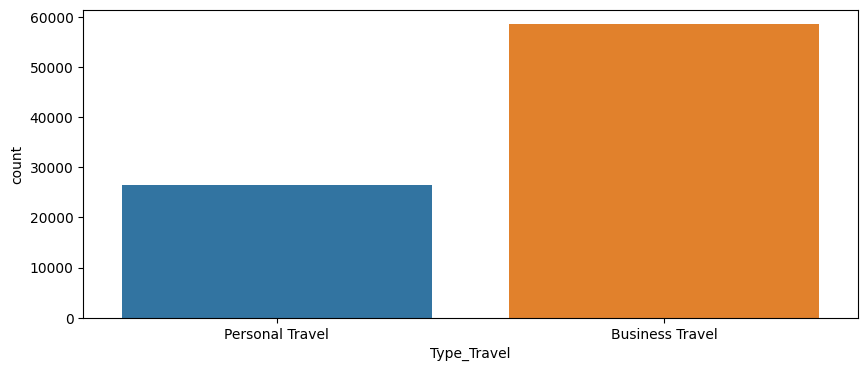

Business Travel   0.69
Personal Travel   0.31
Name: Type_Travel, dtype: float64
____________________


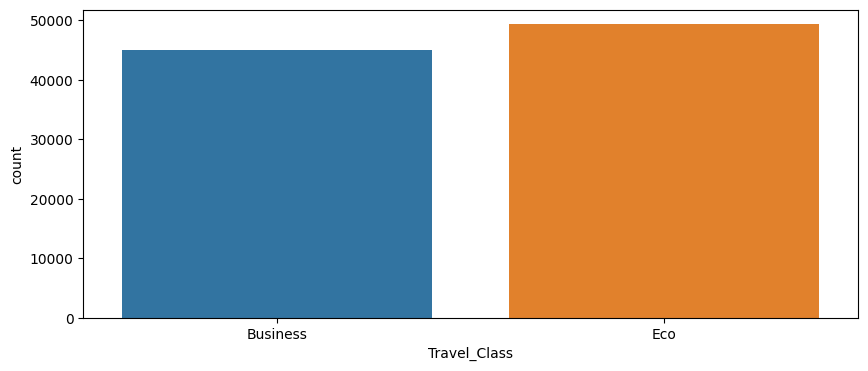

Eco        0.52
Business   0.48
Name: Travel_Class, dtype: float64
____________________


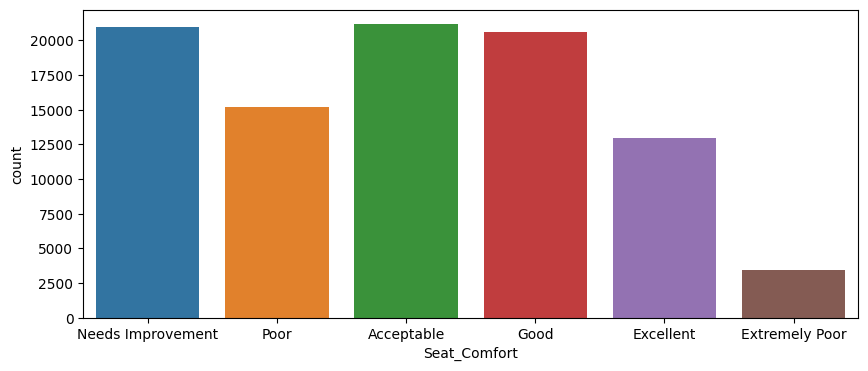

Acceptable          0.22
Needs Improvement   0.22
Good                0.22
Poor                0.16
Excellent           0.14
Extremely Poor      0.04
Name: Seat_Comfort, dtype: float64
____________________


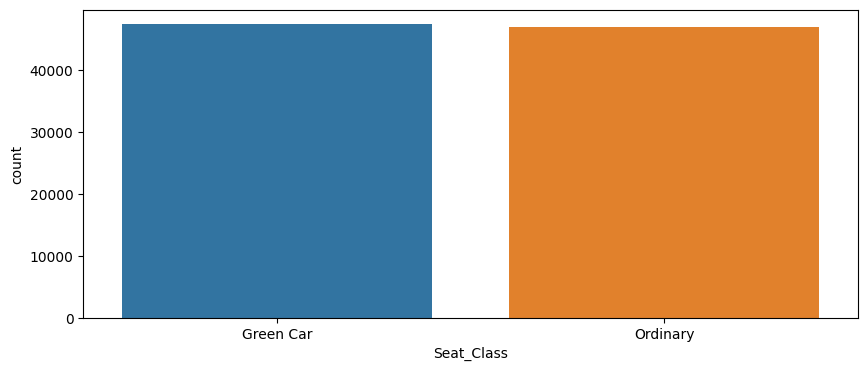

Green Car   0.50
Ordinary    0.50
Name: Seat_Class, dtype: float64
____________________


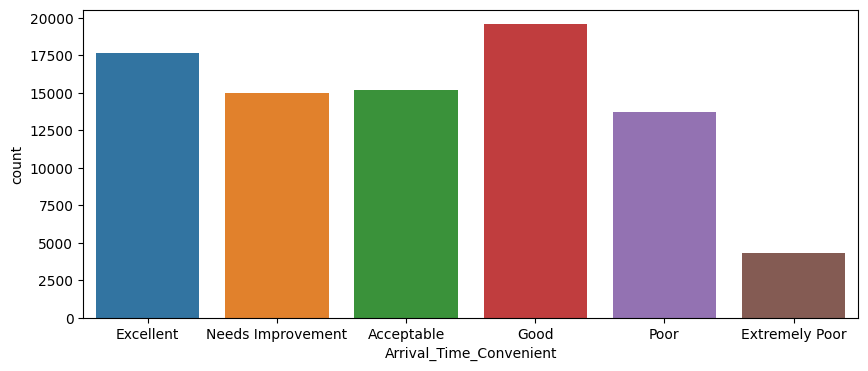

Good                0.23
Excellent           0.21
Acceptable          0.18
Needs Improvement   0.18
Poor                0.16
Extremely Poor      0.05
Name: Arrival_Time_Convenient, dtype: float64
____________________


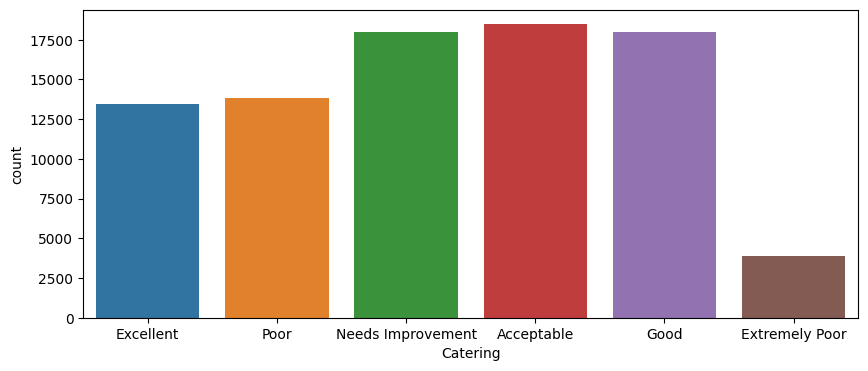

Acceptable          0.22
Needs Improvement   0.21
Good                0.21
Poor                0.16
Excellent           0.16
Extremely Poor      0.05
Name: Catering, dtype: float64
____________________


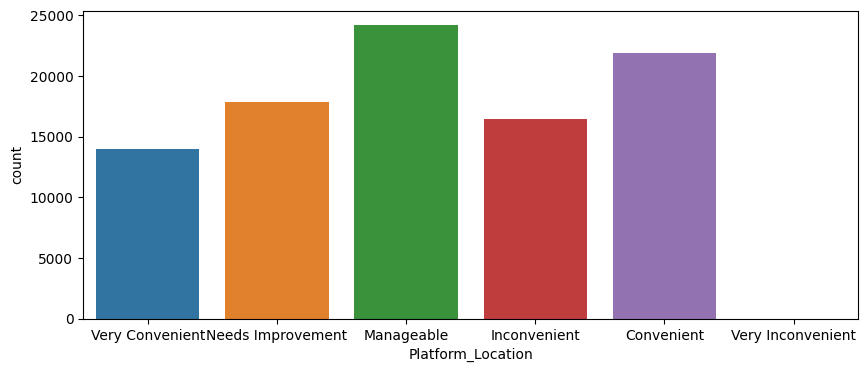

Manageable          0.26
Convenient          0.23
Needs Improvement   0.19
Inconvenient        0.17
Very Convenient     0.15
Very Inconvenient   0.00
Name: Platform_Location, dtype: float64
____________________


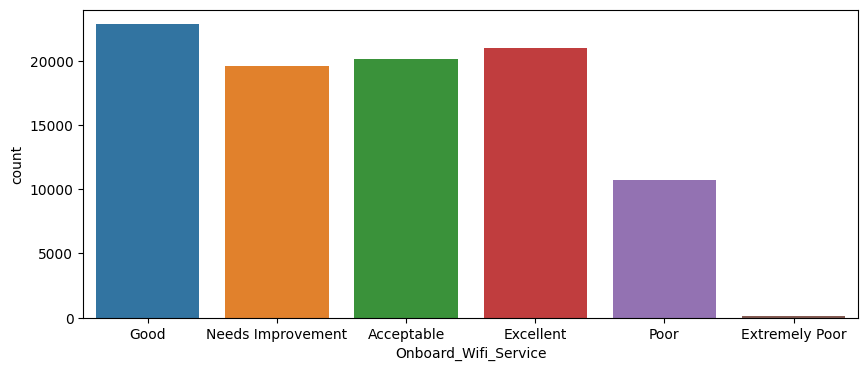

Good                0.24
Excellent           0.22
Acceptable          0.21
Needs Improvement   0.21
Poor                0.11
Extremely Poor      0.00
Name: Onboard_Wifi_Service, dtype: float64
____________________


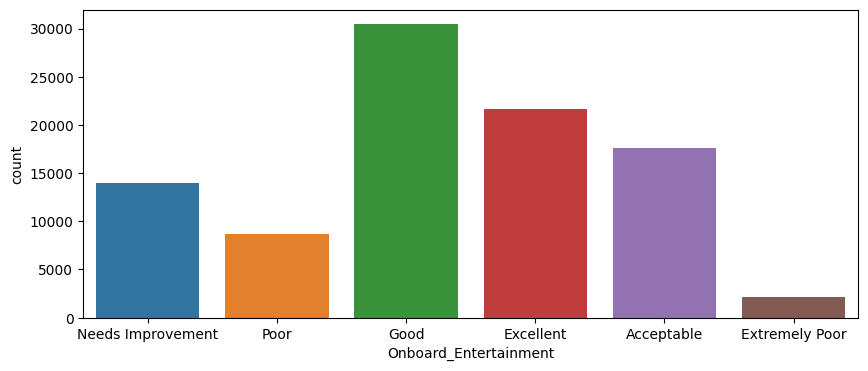

Good                0.32
Excellent           0.23
Acceptable          0.19
Needs Improvement   0.15
Poor                0.09
Extremely Poor      0.02
Name: Onboard_Entertainment, dtype: float64
____________________


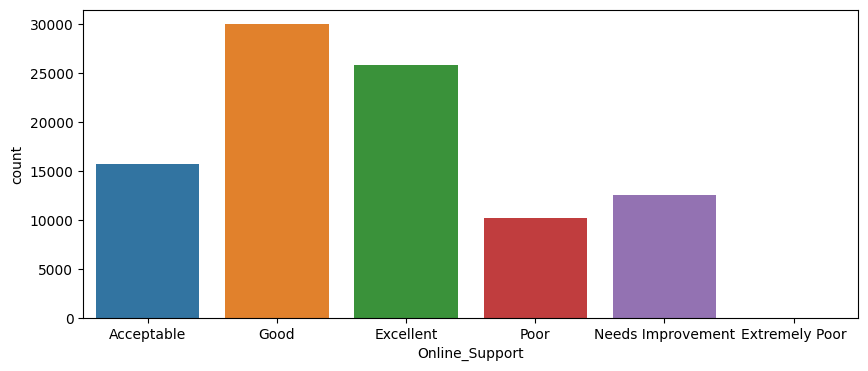

Good                0.32
Excellent           0.27
Acceptable          0.17
Needs Improvement   0.13
Poor                0.11
Extremely Poor      0.00
Name: Online_Support, dtype: float64
____________________


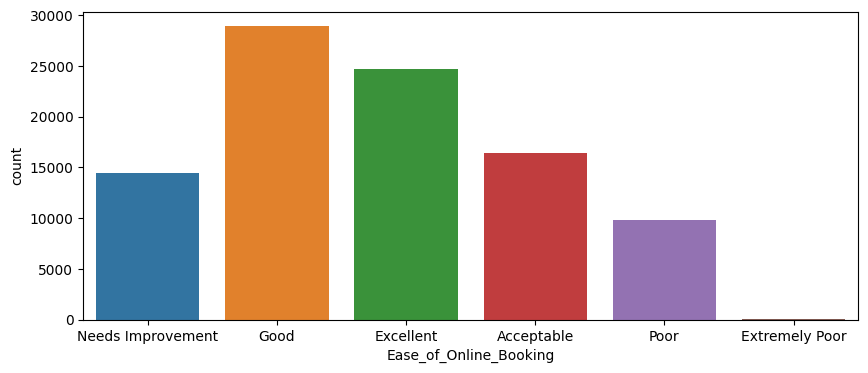

Good                0.31
Excellent           0.26
Acceptable          0.17
Needs Improvement   0.15
Poor                0.10
Extremely Poor      0.00
Name: Ease_of_Online_Booking, dtype: float64
____________________


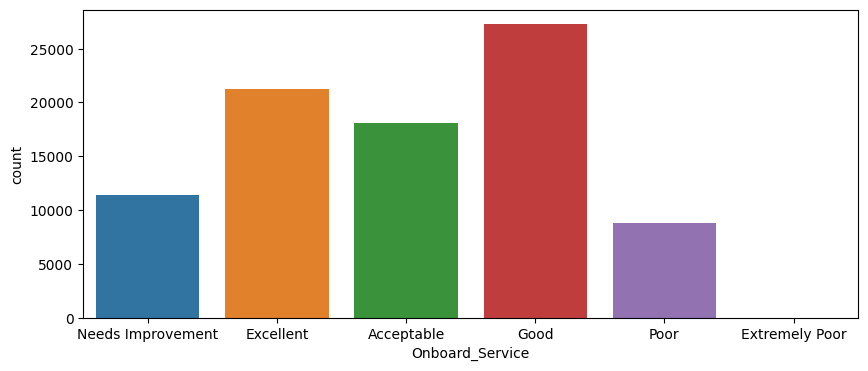

Good                0.31
Excellent           0.25
Acceptable          0.21
Needs Improvement   0.13
Poor                0.10
Extremely Poor      0.00
Name: Onboard_Service, dtype: float64
____________________


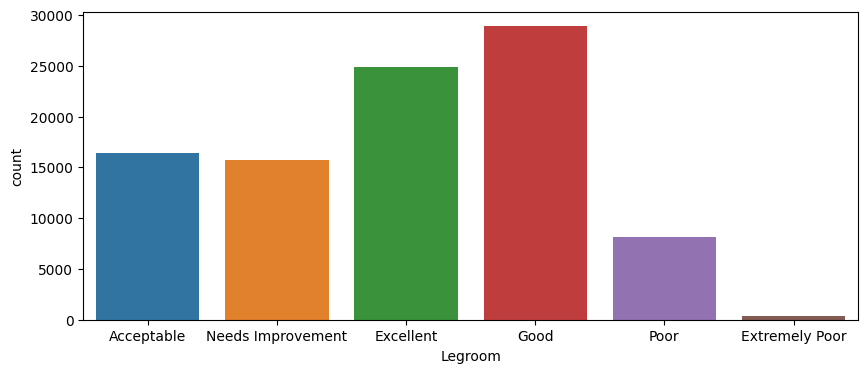

Good                0.31
Excellent           0.26
Acceptable          0.17
Needs Improvement   0.17
Poor                0.09
Extremely Poor      0.00
Name: Legroom, dtype: float64
____________________


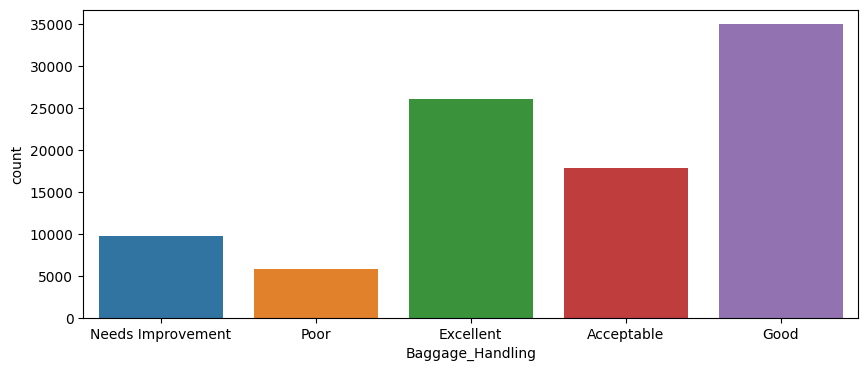

Good                0.37
Excellent           0.28
Acceptable          0.19
Needs Improvement   0.10
Poor                0.06
Name: Baggage_Handling, dtype: float64
____________________


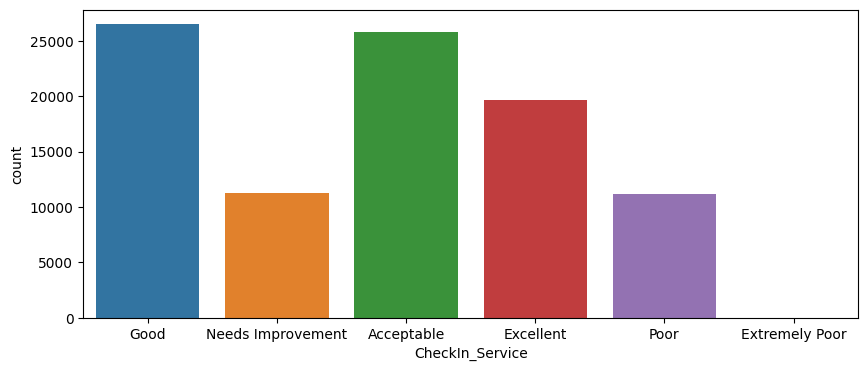

Good                0.28
Acceptable          0.27
Excellent           0.21
Needs Improvement   0.12
Poor                0.12
Extremely Poor      0.00
Name: CheckIn_Service, dtype: float64
____________________


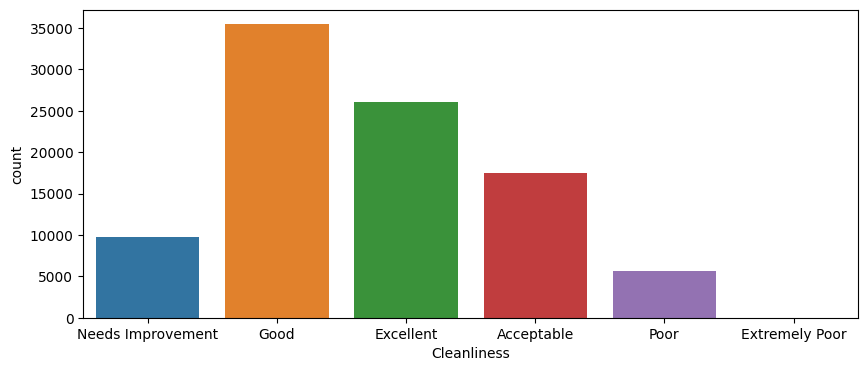

Good                0.38
Excellent           0.28
Acceptable          0.18
Needs Improvement   0.10
Poor                0.06
Extremely Poor      0.00
Name: Cleanliness, dtype: float64
____________________


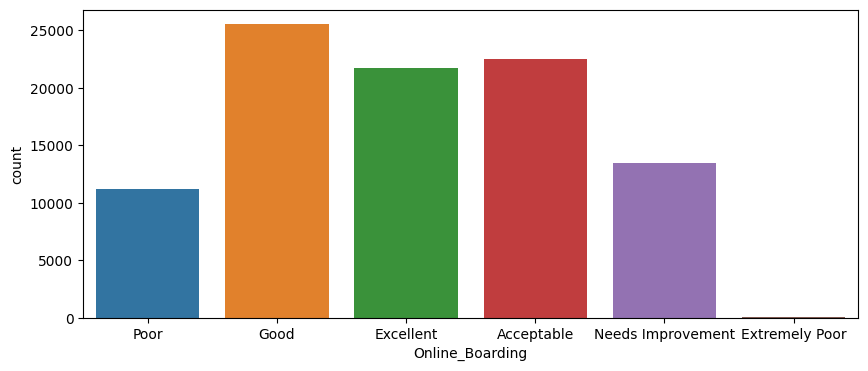

Good                0.27
Acceptable          0.24
Excellent           0.23
Needs Improvement   0.14
Poor                0.12
Extremely Poor      0.00
Name: Online_Boarding, dtype: float64
____________________


In [ ]:
for cols in cat_cols:
  plt.figure(figsize = (10,4))
  sns.countplot(train, x = cols)
  plt.show()
  print(train[cols].value_counts(normalize = True))
  print("__"*10)

<ipython-input-39-c792a4cb2435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True, vmin = -1, vmax = 1, fmt=".2g")


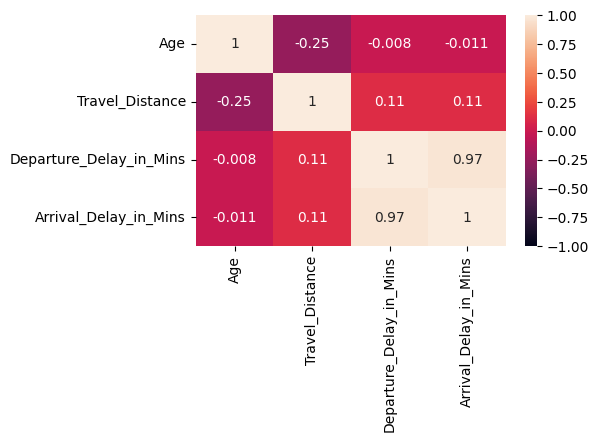

In [ ]:
plt.figure(figsize  = (5,3))
sns.heatmap(train.corr(), annot= True, vmin = -1, vmax = 1, fmt=".2g")
plt.show()

#Feature Engineering
* Imputing missing data

In [ ]:
train.isna().sum()

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
test.isna().sum()

Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [ ]:
train_imput = train.copy() #fill missing values for categorical variables by randomly selecting from possible categories
train_imput_dup = train.copy() # fill missing values for categorical variables by mode

In [ ]:
test_imput = test.copy() #fill missing values for categorical variables by randomly selecting from possible categories
test_imput_dup = test.copy() # fill missing values for categorical variables by mode

In [ ]:
missing_num_cols = ["Age", "Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"]
missing_cat_cols = ['Gender','Customer_Type','Type_Travel','Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

In [ ]:
#replace numeric missing values by mode
for cols in missing_num_cols:
  train_imput[cols].fillna(value = train_imput[cols].mode()[0], inplace = True)
  test_imput[cols].fillna(value = test_imput[cols].mode()[0], inplace = True)

In [ ]:
#replace categorical missing values by random value for train_imput
for cols in missing_cat_cols:
  # Generate random indices for missing values
  missing_indices = train_imput[train_imput[cols].isna()].index
  # Get unique categories in the column
  unique_categories = train_imput[cols].unique()
  unique_categories = [x for x in unique_categories if x is not np.nan]
  # Replace missing values with random sampling
  train_imput.loc[missing_indices, cols] = np.random.choice(unique_categories, len(missing_indices))

In [ ]:
train_imput.isna().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
#replace categorical missing values by random value for test_imput
for cols in missing_cat_cols:
  # Generate random indices for missing values
  missing_indices = test_imput[test_imput[cols].isna()].index
  # Get unique categories in the column
  unique_categories = test_imput[cols].unique()
  unique_categories = [x for x in unique_categories if x is not np.nan]
  # Replace missing values with random sampling
  test_imput.loc[missing_indices, cols] = np.random.choice(unique_categories, len(missing_indices))

In [ ]:
test_imput.isna().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
for cols in missing_cat_cols:
  print(train_imput[cols].value_counts(normalize = True))
  print("_"*10)

Female   0.51
Male     0.49
Name: Gender, dtype: float64
__________
Loyal Customer      0.79
Disloyal Customer   0.21
Name: Customer_Type, dtype: float64
__________
Business Travel   0.67
Personal Travel   0.33
Name: Type_Travel, dtype: float64
__________
Acceptable          0.22
Needs Improvement   0.22
Good                0.22
Poor                0.16
Excellent           0.14
Extremely Poor      0.04
Name: Seat_Comfort, dtype: float64
__________
Good                0.22
Excellent           0.20
Acceptable          0.18
Needs Improvement   0.17
Poor                0.16
Extremely Poor      0.06
Name: Arrival_Time_Convenient, dtype: float64
__________
Acceptable          0.21
Needs Improvement   0.21
Good                0.21
Poor                0.16
Excellent           0.16
Extremely Poor      0.06
Name: Catering, dtype: float64
__________
Manageable          0.26
Convenient          0.23
Needs Improvement   0.19
Inconvenient        0.17
Very Convenient     0.15
Very Inconvenient   0.00

In [ ]:
#replace numeric missing values by mode
for cols in missing_num_cols:
  train_imput_dup[cols].fillna(value = train_imput_dup[cols].mode()[0], inplace = True)
  test_imput_dup[cols].fillna(value = test_imput_dup[cols].mode()[0], inplace = True)

In [ ]:
#replace categorical missing values by mode
for cols in missing_cat_cols:
  train_imput_dup[cols].fillna(value = train_imput_dup[cols].mode()[0], inplace = True)
  test_imput_dup[cols].fillna(value = test_imput_dup[cols].mode()[0], inplace = True)

In [ ]:
train_imput_dup.isna().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
test_imput_dup.isna().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
for cols in missing_cat_cols:
  print(train_imput_dup[cols].value_counts(normalize=True))
  print("_"*20)

Female   0.51
Male     0.49
Name: Gender, dtype: float64
____________________
Loyal Customer      0.83
Disloyal Customer   0.17
Name: Customer_Type, dtype: float64
____________________
Business Travel   0.72
Personal Travel   0.28
Name: Type_Travel, dtype: float64
____________________
Acceptable          0.22
Needs Improvement   0.22
Good                0.22
Poor                0.16
Excellent           0.14
Extremely Poor      0.04
Name: Seat_Comfort, dtype: float64
____________________
Good                0.30
Excellent           0.19
Acceptable          0.16
Needs Improvement   0.16
Poor                0.15
Extremely Poor      0.05
Name: Arrival_Time_Convenient, dtype: float64
____________________
Acceptable          0.29
Needs Improvement   0.19
Good                0.19
Poor                0.15
Excellent           0.14
Extremely Poor      0.04
Name: Catering, dtype: float64
____________________
Manageable          0.26
Convenient          0.23
Needs Improvement   0.19
Inconvenient  

In [ ]:
# Creating dummy variables for categorical column
train_imput = pd.get_dummies(train_imput, drop_first = True)
test_imput = pd.get_dummies(test_imput, drop_first = True)
train_imput_dup = pd.get_dummies(train_imput_dup, drop_first = True)
test_imput_dup = pd.get_dummies(test_imput_dup, drop_first = True)

In [ ]:
train_imput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        94379 non-null  float64
 1   Travel_Distance                            94379 non-null  int64  
 2   Departure_Delay_in_Mins                    94379 non-null  float64
 3   Arrival_Delay_in_Mins                      94379 non-null  float64
 4   Gender_Male                                94379 non-null  uint8  
 5   Customer_Type_Loyal Customer               94379 non-null  uint8  
 6   Type_Travel_Personal Travel                94379 non-null  uint8  
 7   Travel_Class_Eco                           94379 non-null  uint8  
 8   Seat_Comfort_Excellent                     94379 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                94379 non-null  uint8  
 10  Seat_Comfort_Good     

In [ ]:
test_imput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Travel_Distance                            35602 non-null  int64  
 2   Departure_Delay_in_Mins                    35602 non-null  float64
 3   Arrival_Delay_in_Mins                      35602 non-null  float64
 4   Gender_Male                                35602 non-null  uint8  
 5   Customer_Type_Loyal Customer               35602 non-null  uint8  
 6   Type_Travel_Personal Travel                35602 non-null  uint8  
 7   Travel_Class_Eco                           35602 non-null  uint8  
 8   Seat_Comfort_Excellent                     35602 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                35602 non-null  uint8  
 10  Seat_Comfort_Good     

In [ ]:
#drop the below columns because they are not in the test imput dataset
train_imput.drop(['Cleanliness_Extremely Poor','CheckIn_Service_Extremely Poor','Onboard_Service_Extremely Poor','Online_Support_Extremely Poor','Platform_Location_Very Inconvenient'], axis = 1, inplace = True)
train_imput_dup.drop(['Cleanliness_Extremely Poor','CheckIn_Service_Extremely Poor','Onboard_Service_Extremely Poor','Online_Support_Extremely Poor','Platform_Location_Very Inconvenient'], axis = 1, inplace = True)

In [ ]:
#drop the below columns because they have little to no correlation with other variables
#train_imput.drop(['Gender_Male'], axis = 1, inplace = True)
#train_imput_dup.drop(['Gender_Male'], axis = 1, inplace = True)
#test_imput.drop(['Gender_Male'], axis = 1, inplace = True)
#test_imput_dup.drop(['Gender_Male'], axis = 1, inplace = True)

In [ ]:
#drop the below columns because they have little to no correlation with other variables
#train_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#train_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)

In [ ]:
#drop the below columns because they have little to no correlation with other variables
#train_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#train_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)

In [ ]:
#drop the below columns because they have little to no correlation with other variables
#train_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#train_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)
#test_imput_dup.drop(['Gender_Male','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1, inplace = True)

In [ ]:
train_imput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        94379 non-null  float64
 1   Travel_Distance                            94379 non-null  int64  
 2   Departure_Delay_in_Mins                    94379 non-null  float64
 3   Arrival_Delay_in_Mins                      94379 non-null  float64
 4   Gender_Male                                94379 non-null  uint8  
 5   Customer_Type_Loyal Customer               94379 non-null  uint8  
 6   Type_Travel_Personal Travel                94379 non-null  uint8  
 7   Travel_Class_Eco                           94379 non-null  uint8  
 8   Seat_Comfort_Excellent                     94379 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                94379 non-null  uint8  
 10  Seat_Comfort_Good     

In [ ]:
test_imput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Travel_Distance                            35602 non-null  int64  
 2   Departure_Delay_in_Mins                    35602 non-null  float64
 3   Arrival_Delay_in_Mins                      35602 non-null  float64
 4   Gender_Male                                35602 non-null  uint8  
 5   Customer_Type_Loyal Customer               35602 non-null  uint8  
 6   Type_Travel_Personal Travel                35602 non-null  uint8  
 7   Travel_Class_Eco                           35602 non-null  uint8  
 8   Seat_Comfort_Excellent                     35602 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                35602 non-null  uint8  
 10  Seat_Comfort_Good     

# Scaling data

In [ ]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_imput_scaled = scaler.fit_transform(train_imput)
train_imput_scaled = pd.DataFrame(train_imput_scaled, columns = train_imput.columns)

In [ ]:
#scale test_imput
test_imput_scaled = scaler.fit_transform(test_imput)
test_imput_scaled = pd.DataFrame(test_imput_scaled, columns = test_imput.columns)

In [ ]:
#scale train_imput_dup
train_imput_dup_scaled = scaler.fit_transform(train_imput_dup)
train_imput_dup_scaled = pd.DataFrame(train_imput_dup_scaled, columns = train_imput_dup.columns)

In [ ]:
#scale test_imput_dup
test_imput_dup_scaled = scaler.fit_transform(test_imput_dup)
test_imput_dup_scaled = pd.DataFrame(test_imput_dup_scaled, columns = test_imput_dup.columns)

In [ ]:
train_imput_scaled.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,0.83,-1.66,-0.38,-0.26,-0.99,0.52,1.42,-1.05,-0.40,-0.20,...,-0.37,-0.62,-0.78,2.94,-0.25,-0.55,-0.01,-0.61,-0.41,2.73
1,0.57,0.22,-0.15,-0.39,1.01,0.52,1.42,0.96,-0.40,-0.20,...,-0.37,-0.62,1.29,-0.34,-0.25,-0.55,-0.01,1.64,-0.41,-0.37
2,0.24,-0.89,1.64,2.71,-0.99,0.52,-0.70,-1.05,-0.40,-0.20,...,-0.37,1.62,-0.78,-0.34,-0.25,1.83,-0.01,-0.61,-0.41,-0.37
3,0.30,-1.17,-0.04,0.08,-0.99,0.52,-0.70,-1.05,-0.40,-0.20,...,-0.37,-0.62,-0.78,-0.34,-0.25,-0.55,-0.01,-0.61,-0.41,-0.37
4,0.70,0.00,-0.38,-0.39,-0.99,0.52,-0.70,-1.05,-0.40,-0.20,...,-0.37,-0.62,1.29,-0.34,-0.25,-0.55,-0.01,1.64,-0.41,-0.37


In [ ]:
test_imput_scaled.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,-0.23,-1.42,-0.39,-0.40,-0.98,-1.93,-0.69,-1.04,-0.40,-0.20,...,-0.37,1.61,-0.78,-0.34,-0.25,-0.55,-0.01,-0.61,-0.41,2.73
1,-1.22,-0.55,-0.15,0.33,-0.98,-1.93,-0.69,-1.04,-0.40,5.07,...,-0.37,1.61,-0.78,-0.34,-0.25,-0.55,-0.01,-0.61,-0.41,-0.37
2,1.36,0.82,-0.39,-0.40,1.02,0.52,-0.69,-1.04,2.52,-0.20,...,-0.37,-0.62,-0.78,2.98,-0.25,1.82,-0.01,-0.61,-0.41,-0.37
3,-0.69,-0.62,-0.39,-0.40,-0.98,0.52,1.44,0.96,-0.40,-0.20,...,-0.37,1.61,-0.78,-0.34,-0.25,-0.55,-0.01,-0.61,-0.41,2.73
4,-1.42,-0.37,0.06,-0.40,1.02,-1.93,-0.69,-1.04,2.52,-0.20,...,-0.37,1.61,-0.78,-0.34,-0.25,1.82,-0.01,-0.61,-0.41,-0.37


# PCA (Principal Component Analysis)

In [ ]:
# Importing PCA and t-SNE
from sklearn.decomposition import PCA

In [ ]:
# Defining the number of principal components to generate
n = train_imput_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
train_pca = pd.DataFrame(pca1.fit_transform(train_imput_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

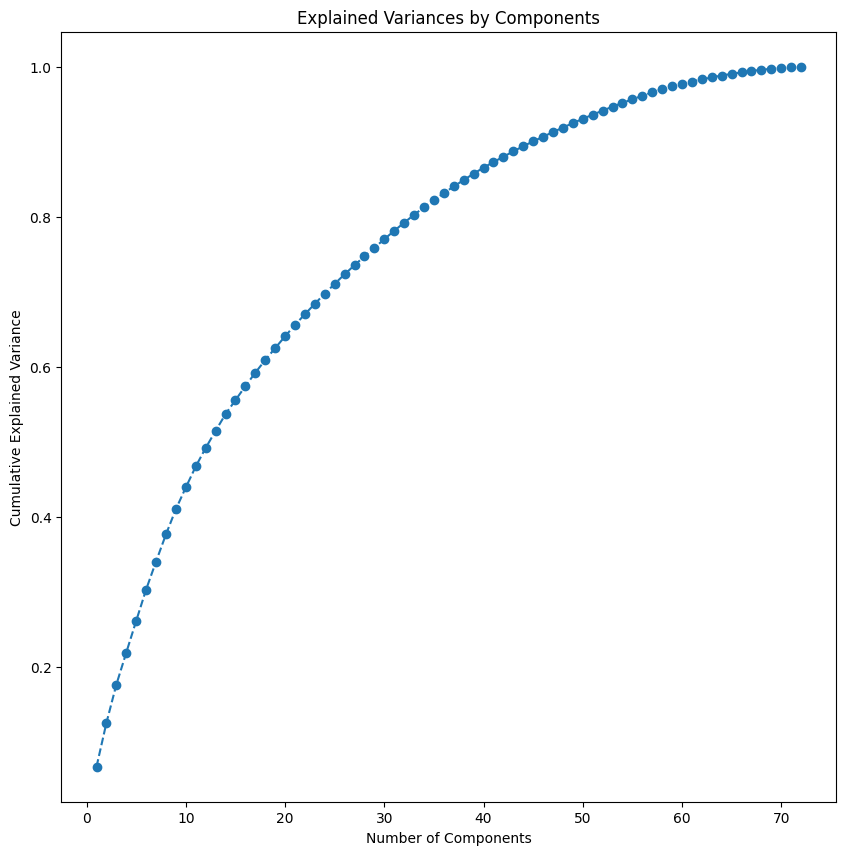

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, n+1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  25


In [ ]:
# Defining the number of principal components to generate
n = train_imput_dup_scaled.shape[1]

# Finding principal components for the data
pca2 = PCA(n_components = n, random_state = 1)
train_pca1 = pd.DataFrame(pca2.fit_transform(train_imput_dup_scaled))

# The percentage of variance explained by each principal component
exp_var2 = pca2.explained_variance_ratio_

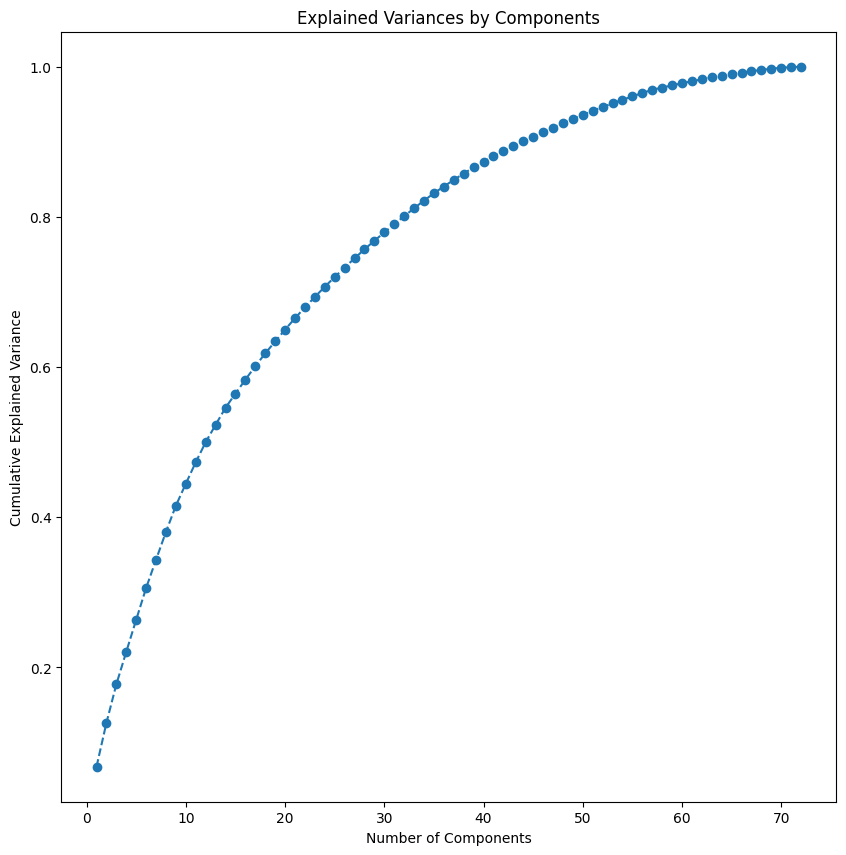

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, n+1), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var2):

    sum = sum + i

    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  24


# Create ANN models

In [ ]:
!pip install scikeras

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, BatchNormalization, LeakyReLU
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_imput_scaled,Y_train, test_size = 0.2, random_state = 42,stratify = Y_train)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_imput_dup_scaled,Y_train, test_size = 0.2, random_state = 42,stratify = Y_train)

In [ ]:
Y_train['Overall_Experience'].value_counts(normalize = True)

1   0.55
0   0.45
Name: Overall_Experience, dtype: float64

In [ ]:
print("X_train1.shape = ", X_train1.shape, "X_test1.shape = ", X_test1.shape, "y_train1.shape = ", y_train1.shape, "y_test1.shape = ", y_test1.shape)
print("X_train2.shape = ", X_train2.shape, "X_test2.shape = ", X_test2.shape, "y_train2.shape = ", y_train2.shape, "y_test2.shape = ", y_test2.shape)

X_train1.shape =  (75503, 73) X_test1.shape =  (18876, 73) y_train1.shape =  (75503, 1) y_test1.shape =  (18876, 1)
X_train2.shape =  (75503, 73) X_test2.shape =  (18876, 73) y_train2.shape =  (75503, 1) y_test2.shape =  (18876, 1)


In [ ]:
backend.clear_session()
#set seed for random number generator
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Flatten the input to add dense convolutional layers on top of it
model1.add(Flatten(input_shape=(train_imput_dup_scaled.shape[1],)))

# Adding a sequential layer with 64 neurons
model1.add(Dense(64, activation='relu'))

# Adding a sequential layer with 32 neurons
model1.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and activation functions as sigmoid since this is a binary classification problem
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 73)                0         
                                                                 
 dense (Dense)               (None, 64)                4736      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6849 (26.75 KB)
Trainable params: 6849 (26.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
fit_history1 = model1.fit(X_train2, y_train2,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 32)
#fit_history1 = model1.fit(X_train1, y_train1,validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 64)

Epoch 1/20
1888/1888 [==============================] - 11s 4ms/step - loss: 0.1962 - accuracy: 0.9161 - val_loss: 0.1497 - val_accuracy: 0.9344
Epoch 2/20
  49/1888 [..............................] - ETA: 6s - loss: 0.1426 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1888/1888 [==============================] - 9s 5ms/step - loss: 0.1330 - accuracy: 0.9430 - val_loss: 0.1324 - val_accuracy: 0.9431
Epoch 3/20
1888/1888 [==============================] - 8s 4ms/step - loss: 0.1172 - accuracy: 0.9489 - val_loss: 0.1270 - val_accuracy: 0.9458
Epoch 4/20
1888/1888 [==============================] - 9s 5ms/step - loss: 0.1082 - accuracy: 0.9529 - val_loss: 0.1252 - val_accuracy: 0.9452
Epoch 5/20
1888/1888 [==============================] - 9s 5ms/step - loss: 0.1027 - accuracy: 0.9553 - val_loss: 0.1246 - val_accuracy: 0.9480
Epoch 6/20
1888/1888 [==============================] - 9s 5ms/step - loss: 0.0982 - accuracy: 0.9567 - val_loss: 0.1214 - val_accuracy: 0.9484
Epoch 7/20
1888/1888 [==============================] - 9s 5ms/step - loss: 0.0939 - accuracy: 0.9590 - val_loss: 0.1250 - val_accuracy: 0.9495
Epoch 8/20
1888/1888 [==============================] - 7s 4ms/step - loss: 0.0898 - accuracy: 0.9612 - val_loss: 0.1232 - val_accuracy: 0.9487


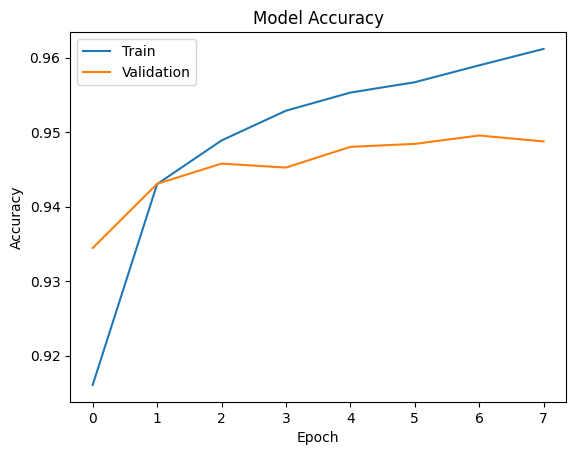

In [ ]:
plt.plot(fit_history1.history['accuracy'])
plt.plot(fit_history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

In [ ]:
model1.evaluate(X_test2, y_test2)

590/590 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9488


[0.12127833068370819, 0.9487709403038025]

590/590 [==============================] - 1s 2ms/step
Best Threshold=0.498590, G-Mean=0.950


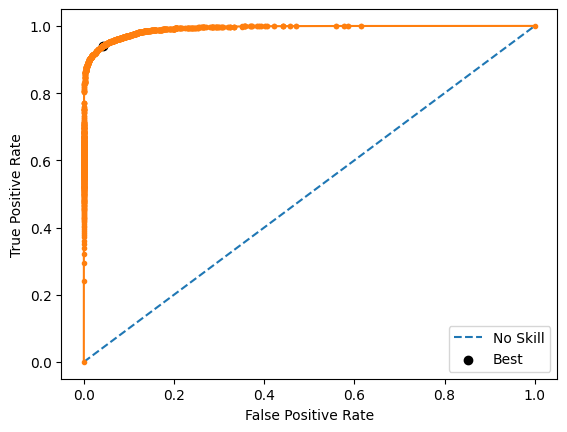

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# Predict probabilities
yhat1 = model1.predict(X_test2)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test2, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predictions on the test data
test_pred1 = model1.predict(X_test2)
test_pred1 = (test_pred1 > thresholds1[ix])
#test_pred1

590/590 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8557
           1       0.96      0.94      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



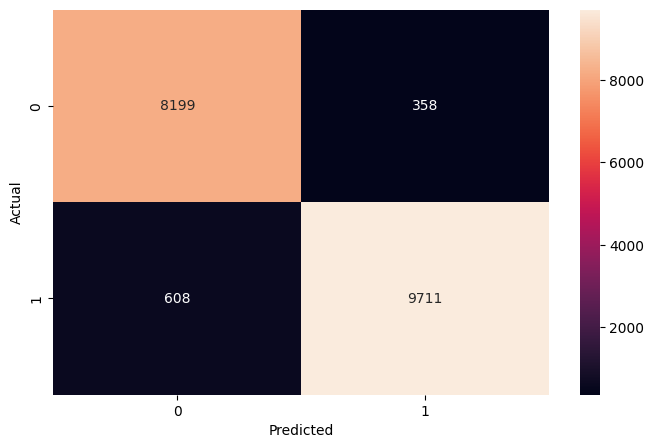

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2,test_pred1))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2,test_pred1)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
#Predictions on the test data
test_pred1 = model1.predict(test_imput_dup_scaled)
test_pred1 = (test_pred1 > thresholds1[ix])
#test_pred1

1113/1113 [==============================] - 3s 2ms/step


In [ ]:
test_pred1_df = test_pred1.astype(int)

In [ ]:
test_pred1_df = pd.DataFrame(test_pred1_df,columns = ['Overall_Experience'])

In [ ]:
test_pred1_df['Overall_Experience'].value_counts(normalize = True)

1   0.53
0   0.47
Name: Overall_Experience, dtype: float64

In [ ]:
output1 = test_ID.copy()

In [ ]:
output1.insert(loc=1, column='Overall_Experience', value=test_pred1_df)

In [ ]:
output1.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output1['Overall_Experience'].value_counts(normalize = True)

1   0.53
0   0.47
Name: Overall_Experience, dtype: float64

In [ ]:
output1.to_csv('/content/drive/MyDrive/DSML/Hackathon/output1.csv', encoding='utf-8', index=False)

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Flatten the input to add dense convolutional layers on top of it
model2.add(Flatten(input_shape=(train_imput_dup_scaled.shape[1],)))

# Adding a sequential layer with 256 neurons
model2.add(Dense(256, activation='relu'))

# Adding a sequential layer with 128 neurons
model2.add(Dense(128, activation='relu'))

# Adding a sequential layer with dropout = 0.2
model2.add(Dropout(0.2))

# Adding a sequential layer with 64 neurons
model2.add(Dense(64, activation='relu'))

# Adding a sequential layer with 64 neurons
model2.add(Dense(64, activation='relu'))

# Adding a sequential layer with 32 neurons
model2.add(Dense(32, activation='relu'))

# Adding a sequential layer with BatchNormalization
model2.add(BatchNormalization())

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 73)                0         
                                                                 
 dense (Dense)               (None, 256)               18944     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
fit_history2 = model2.fit(train_imput_dup_scaled, Y_train,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 32)
#fit_history2 = model2.fit(train_imput_scaled, Y_train, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 64)

Epoch 1/20
2360/2360 [==============================] - 27s 7ms/step - loss: 0.1874 - accuracy: 0.9213 - val_loss: 0.1364 - val_accuracy: 0.9424
Epoch 2/20
   1/2360 [..............................] - ETA: 59s - loss: 0.1776 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2360/2360 [==============================] - 16s 7ms/step - loss: 0.1374 - accuracy: 0.9424 - val_loss: 0.1240 - val_accuracy: 0.9475
Epoch 3/20
2360/2360 [==============================] - 14s 6ms/step - loss: 0.1262 - accuracy: 0.9467 - val_loss: 0.1143 - val_accuracy: 0.9522
Epoch 4/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1163 - accuracy: 0.9499 - val_loss: 0.1135 - val_accuracy: 0.9514
Epoch 5/20
2360/2360 [==============================] - 15s 7ms/step - loss: 0.1101 - accuracy: 0.9533 - val_loss: 0.1153 - val_accuracy: 0.9518
Epoch 6/20
2360/2360 [==============================] - 14s 6ms/step - loss: 0.1058 - accuracy: 0.9548 - val_loss: 0.1112 - val_accuracy: 0.9527
Epoch 7/20
2360/2360 [==============================] - 16s 7ms/step - loss: 0.1016 - accuracy: 0.9564 - val_loss: 0.1137 - val_accuracy: 0.9523
Epoch 8/20
2360/2360 [==============================] - 15s 7ms/step - loss: 0.0987 - accuracy: 0.9577 - val_loss: 0.1091 - val_accuracy: 0.9

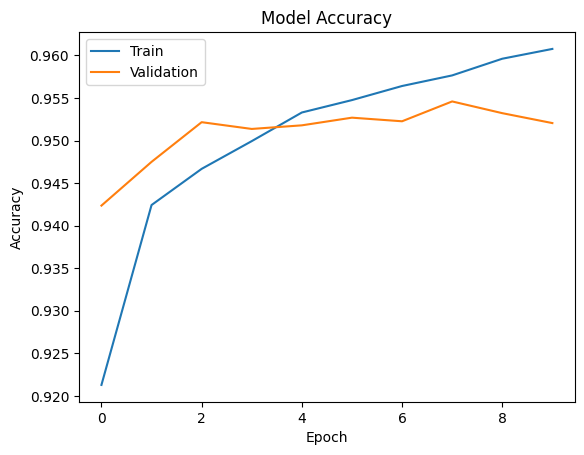

In [ ]:
plt.plot(fit_history2.history['accuracy'])
plt.plot(fit_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

2950/2950 [==============================] - 6s 2ms/step
Best Threshold=0.420948, G-Mean=0.967


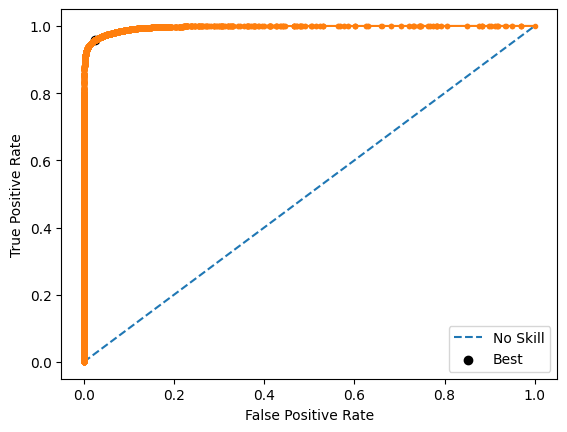

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# Predict probabilities
yhat2 = model2.predict(train_imput_dup_scaled)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(Y_train, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predictions on the test data
test_pred2 = model2.predict(X_test2)
test_pred2 = (test_pred2 > thresholds2[ix])
#test_pred2

590/590 [==============================] - 2s 3ms/step


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8557
           1       0.98      0.96      0.97     10319

    accuracy                           0.97     18876
   macro avg       0.96      0.97      0.97     18876
weighted avg       0.97      0.97      0.97     18876



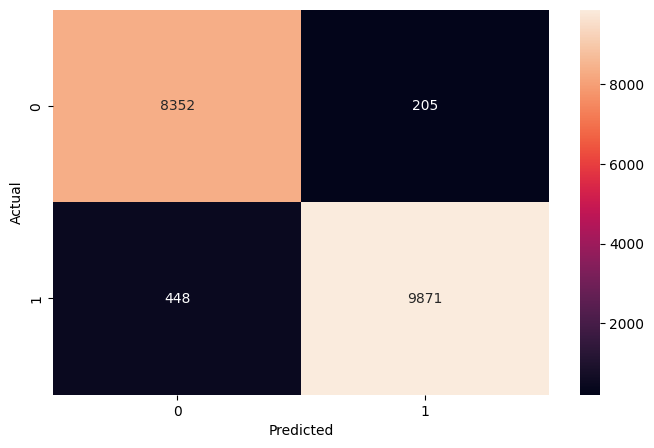

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2,test_pred2))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2,test_pred2)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
#Predictions on the test data
test_pred2 = model2.predict(test_imput_dup_scaled)
test_pred2 = (test_pred2 > thresholds2[ix])
#test_pred2

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
test_pred2_df = test_pred2.astype(int)

In [ ]:
test_pred2_df = pd.DataFrame(test_pred2_df,columns = ['Overall_Experience'])

In [ ]:
test_pred2_df['Overall_Experience'].value_counts(normalize = True)

1   0.53
0   0.47
Name: Overall_Experience, dtype: float64

In [ ]:
output2 = travel_test['ID'].copy()
output2 = pd.DataFrame(output2, columns=['ID'])

In [ ]:
output2.insert(loc=1, column='Overall_Experience', value=test_pred2_df)

In [ ]:
output2.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output2['Overall_Experience'].value_counts(normalize = True)

1   0.53
0   0.47
Name: Overall_Experience, dtype: float64

In [ ]:
output2.to_csv('/content/drive/MyDrive/DSML/Hackathon/output2.csv', encoding='utf-8', index=False)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


In [ ]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_dim = train_imput_scaled.shape[1]))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
fit_history3 = model3.fit(train_imput_dup_scaled, Y_train, callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 32)

Epoch 1/20
2360/2360 [==============================] - 18s 7ms/step - loss: 0.2242 - accuracy: 0.9028 - val_loss: 0.1472 - val_accuracy: 0.9391
Epoch 2/20
  19/2360 [..............................] - ETA: 13s - loss: 0.1752 - accuracy: 0.9112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2360/2360 [==============================] - 15s 6ms/step - loss: 0.1609 - accuracy: 0.9312 - val_loss: 0.1281 - val_accuracy: 0.9429
Epoch 3/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1434 - accuracy: 0.9389 - val_loss: 0.1210 - val_accuracy: 0.9480
Epoch 4/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1326 - accuracy: 0.9436 - val_loss: 0.1169 - val_accuracy: 0.9497
Epoch 5/20
2360/2360 [==============================] - 16s 7ms/step - loss: 0.1261 - accuracy: 0.9455 - val_loss: 0.1156 - val_accuracy: 0.9510
Epoch 6/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1220 - accuracy: 0.9475 - val_loss: 0.1125 - val_accuracy: 0.9521
Epoch 7/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1183 - accuracy: 0.9483 - val_loss: 0.1110 - val_accuracy: 0.9520
Epoch 8/20
2360/2360 [==============================] - 15s 6ms/step - loss: 0.1167 - accuracy: 0.9492 - val_loss: 0.1104 - val_accuracy: 0.9

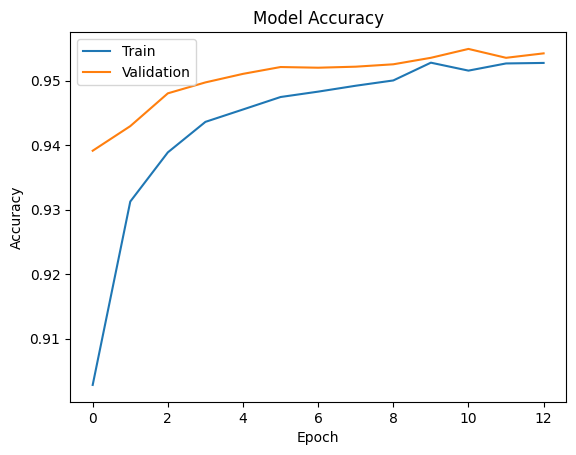

In [ ]:
plt.plot(fit_history3.history['accuracy'])
plt.plot(fit_history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

2950/2950 [==============================] - 5s 2ms/step
Best Threshold=0.469859, G-Mean=0.961


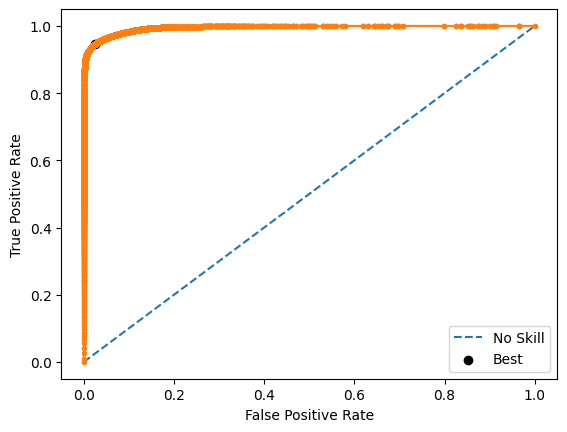

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# Predict probabilities
yhat3 = model3.predict(train_imput_dup_scaled)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(Y_train, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predictions on the test data
test_pred3 = model3.predict(X_test1)
test_pred3 = (test_pred3 > thresholds3[ix])
#test_pred3

590/590 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8557
           1       0.98      0.93      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



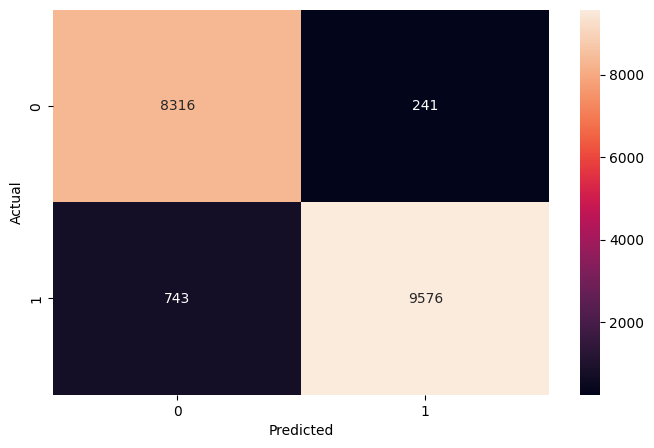

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2,test_pred3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2,test_pred3)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
#Predictions on the test data
test_pred3 = model3.predict(test_imput_dup_scaled)
test_pred3 = (test_pred3 > thresholds3[ix])
#test_pred3

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
test_pred3_df = test_pred3.astype(int)

In [ ]:
test_pred3_df = pd.DataFrame(test_pred3_df,columns = ['Overall_Experience'])

In [ ]:
test_pred3_df['Overall_Experience'].value_counts(normalize = True)

1   0.53
0   0.47
Name: Overall_Experience, dtype: float64

In [ ]:
output3 = travel_test['ID'].copy()
output3 = pd.DataFrame(output3, columns=['ID'])

In [ ]:
output3.insert(loc=1, column='Overall_Experience', value=test_pred3_df)

In [ ]:
output3.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output3['Overall_Experience'].value_counts()

1    18816
0    16786
Name: Overall_Experience, dtype: int64

In [ ]:
output3.to_csv('/content/drive/MyDrive/DSML/Hackathon/output3.csv', encoding='utf-8', index=False)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = train_imput_scaled.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(train_imput_dup_scaled, Y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


2360/2360 [==============================] - 15s 6ms/step - loss: 0.1958 - accuracy: 0.9165 - val_loss: 0.1404 - val_accuracy: 0.9401
Best: 0.937444 using {'optimizer__learning_rate': 0.01, 'batch_size': 32}


In [ ]:
model4=create_model_v4()
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               18944     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

fit_history4=model4.fit(train_imput_dup_scaled, Y_train, callbacks = callbacks, epochs=20, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/20
2360/2360 [==============================] - 25s 7ms/step - loss: 0.2014 - accuracy: 0.9172 - val_loss: 0.1572 - val_accuracy: 0.9355
Epoch 2/20
  27/2360 [..............................] - ETA: 9s - loss: 0.1880 - accuracy: 0.9167

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2360/2360 [==============================] - 13s 5ms/step - loss: 0.1758 - accuracy: 0.9281 - val_loss: 0.1370 - val_accuracy: 0.9389
Epoch 3/20
2360/2360 [==============================] - 12s 5ms/step - loss: 0.1635 - accuracy: 0.9324 - val_loss: 0.1416 - val_accuracy: 0.9382
Epoch 4/20
2360/2360 [==============================] - 11s 5ms/step - loss: 0.1629 - accuracy: 0.9329 - val_loss: 0.1387 - val_accuracy: 0.9449


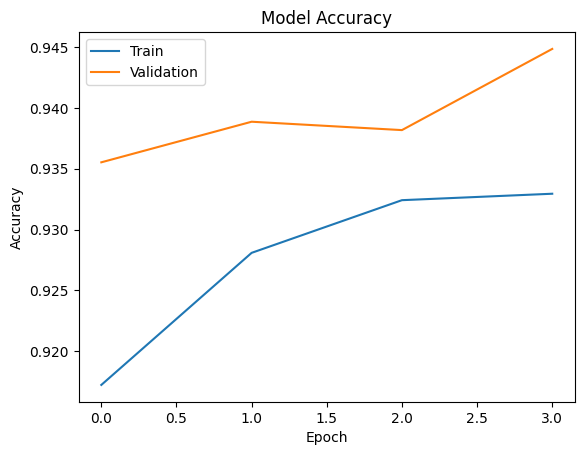

In [ ]:
plt.plot(fit_history4.history['accuracy'])
plt.plot(fit_history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

2950/2950 [==============================] - 6s 2ms/step
Best Threshold=0.500587, G-Mean=0.948


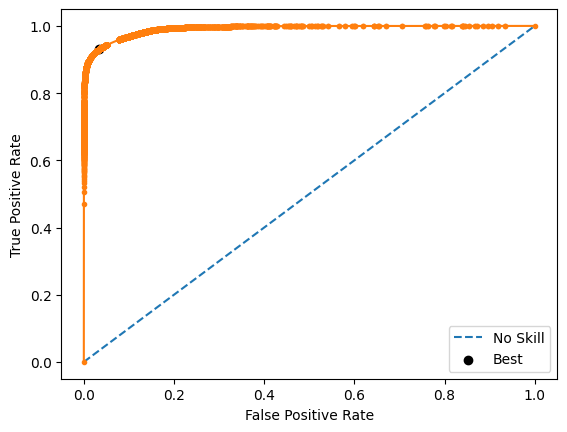

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# Predict probabilities
yhat4 = model4.predict(train_imput_dup_scaled)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(Y_train, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#predictions on the test data
test_pred4 = model4.predict(X_test1)
test_pred4 = (test_pred4 > thresholds4[ix])
#test_pred4

590/590 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8557
           1       0.97      0.92      0.95     10319

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876



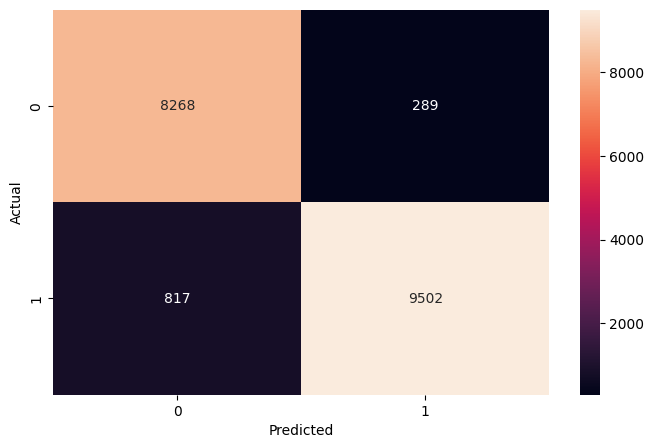

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2,test_pred4))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2,test_pred4)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
#Predictions on the test data
test_pred4 = model2.predict(test_imput_scaled)
test_pred4 = (test_pred4 > thresholds4[ix])
#test_pred4

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
test_pred4_df = test_pred4.astype(int)

In [ ]:
test_pred4_df = pd.DataFrame(test_pred4_df,columns = ['Overall_Experience'])

In [ ]:
test_pred4_df['Overall_Experience'].value_counts(normalize = True)

1   0.52
0   0.48
Name: Overall_Experience, dtype: float64

In [ ]:
output4 = test_ID.copy()
#output4 = travel_test['ID'].copy()
#output4 = pd.DataFrame(output4, columns=['ID'])

In [ ]:
output4.insert(loc=1, column='Overall_Experience', value=test_pred4_df)

In [ ]:
output4['Overall_Experience'].value_counts()

1    18535
0    17067
Name: Overall_Experience, dtype: int64

In [ ]:
output4.to_csv('/content/drive/MyDrive/DSML/Hackathon/output4.csv', encoding='utf-8', index=False)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model5 = Sequential()
model5.add(Dense(256,activation='relu', kernel_initializer='he_uniform', input_dim = train_imput_scaled.shape[1]))
#model5.add(LeakyReLU(0.1))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
#model5.add(LeakyReLU(0.1))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(32,activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
#model5.add(LeakyReLU(0.1))
model5.add(Dense(1, activation = 'sigmoid'))



model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               18944     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
fit_history5 = model5.fit(train_imput_dup_scaled, Y_train,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 32)
#fit_history1 = model1.fit(X_train1, y_train1,validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 64)

Epoch 1/20
2360/2360 [==============================] - 24s 9ms/step - loss: 0.2460 - accuracy: 0.8939 - val_loss: 0.1476 - val_accuracy: 0.9391
Epoch 2/20
  17/2360 [..............................] - ETA: 15s - loss: 0.2035 - accuracy: 0.9136

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2360/2360 [==============================] - 21s 9ms/step - loss: 0.1788 - accuracy: 0.9244 - val_loss: 0.1324 - val_accuracy: 0.9430
Epoch 3/20
2360/2360 [==============================] - 20s 8ms/step - loss: 0.1613 - accuracy: 0.9315 - val_loss: 0.1249 - val_accuracy: 0.9480
Epoch 4/20
2360/2360 [==============================] - 23s 10ms/step - loss: 0.1463 - accuracy: 0.9380 - val_loss: 0.1178 - val_accuracy: 0.9495
Epoch 5/20
2360/2360 [==============================] - 21s 9ms/step - loss: 0.1386 - accuracy: 0.9422 - val_loss: 0.1140 - val_accuracy: 0.9523
Epoch 6/20
2360/2360 [==============================] - 22s 9ms/step - loss: 0.1314 - accuracy: 0.9439 - val_loss: 0.1101 - val_accuracy: 0.9535
Epoch 7/20
2360/2360 [==============================] - 21s 9ms/step - loss: 0.1258 - accuracy: 0.9463 - val_loss: 0.1092 - val_accuracy: 0.9544
Epoch 8/20
2360/2360 [==============================] - 19s 8ms/step - loss: 0.1241 - accuracy: 0.9469 - val_loss: 0.1087 - val_accuracy: 0.

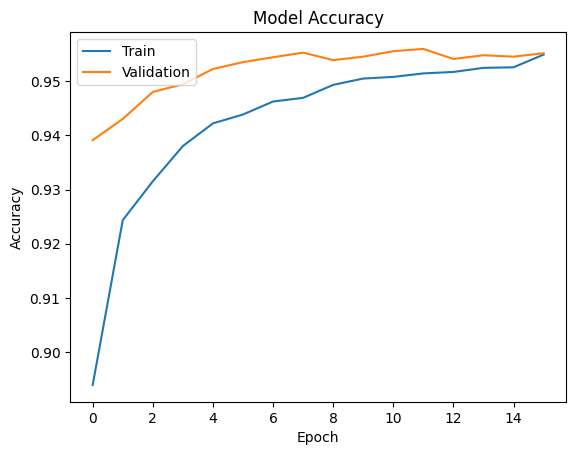

In [ ]:
plt.plot(fit_history5.history['accuracy'])
plt.plot(fit_history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

In [ ]:
model5.evaluate(X_test2, y_test2)

590/590 [==============================] - 2s 3ms/step - loss: 0.0858 - accuracy: 0.9604


[0.0857585147023201, 0.9603729844093323]

590/590 [==============================] - 1s 2ms/step
Best Threshold=0.628922, G-Mean=0.962


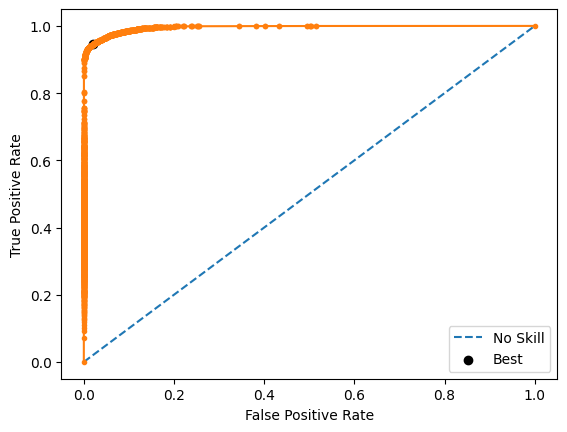

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# Predict probabilities
yhat5 = model5.predict(X_test2)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test2, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predictions on the test data
test_pred5 = model5.predict(X_test2)
test_pred5 = (test_pred5 > thresholds5[ix])
#test_pred1

590/590 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8557
           1       0.98      0.95      0.96     10319

    accuracy                           0.96     18876
   macro avg       0.96      0.96      0.96     18876
weighted avg       0.96      0.96      0.96     18876



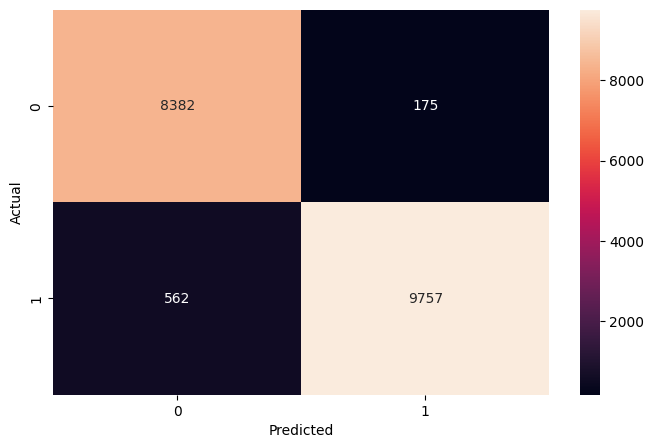

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test2,test_pred5))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test2,test_pred5)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
#Predictions on the test data
test_pred5 = model5.predict(test_imput_scaled)
test_pred5 = (test_pred5 > thresholds1[ix])
#test_pred1

1113/1113 [==============================] - 2s 2ms/step


In [ ]:
test_pred5_df = test_pred5.astype(int)

In [ ]:
test_pred5_df = pd.DataFrame(test_pred5_df,columns = ['Overall_Experience'])

In [ ]:
test_pred5_df['Overall_Experience'].value_counts(normalize = True)

1   0.62
0   0.38
Name: Overall_Experience, dtype: float64

In [ ]:
output5 = test_ID.copy()

In [ ]:
output5.insert(loc=1, column='Overall_Experience', value=test_pred5_df)

In [ ]:
output5.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output5['Overall_Experience'].value_counts(normalize = True)

1   0.62
0   0.38
Name: Overall_Experience, dtype: float64

In [ ]:
output5.to_csv('/content/drive/MyDrive/DSML/Hackathon/output5.csv', encoding='utf-8', index=False)

# Statsmodel

In [ ]:
# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Adding the intercept term
train_imput_scaled = sm.add_constant(train_imput_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(Y_train, train_imput_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:     Overall_Experience   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2124.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:18:08   Log-Likelihood:                -20233.
No. Observations:               94379   AIC:                         4.062e+04
Df Residuals:                   94300   BIC:                         4.137e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(train_imput_scaled.values, i) for i in range(train_imput_scaled.shape[1])],
    index = train_imput_scaled.columns,
    dtype = float)

#print("VIF Scores: \nn{}\n".format(vif_series))
print(vif_series[:20])

const                                1.00
Age                                  1.21
Travel_Distance                      1.17
Departure_Delay_in_Mins             12.46
Arrival_Delay_in_Mins               12.47
                                     ... 
Online_Boarding_Excellent            2.60
Online_Boarding_Extremely Poor       1.81
Online_Boarding_Good                 2.55
Online_Boarding_Needs Improvement    3.44
Online_Boarding_Poor                 3.24
Length: 79, dtype: float64


In [ ]:
print(vif_series[:20])

const                                        1.00
Age                                          1.21
Travel_Distance                              1.17
Departure_Delay_in_Mins                     12.46
Arrival_Delay_in_Mins                       12.47
Gender_Male                                  1.08
Customer_Type_Loyal Customer                 1.31
Type_Travel_Personal Travel                  1.58
Travel_Class_Eco                             1.67
Seat_Comfort_Excellent                       2.74
Seat_Comfort_Extremely Poor                  2.33
Seat_Comfort_Good                            2.90
Seat_Comfort_Needs Improvement               3.17
Seat_Comfort_Poor                            3.23
Seat_Class_Ordinary                          1.00
Arrival_Time_Convenient_Excellent            2.80
Arrival_Time_Convenient_Extremely Poor       1.59
Arrival_Time_Convenient_Good                 2.68
Arrival_Time_Convenient_Needs Improvement    2.64
Arrival_Time_Convenient_Poor                 2.72


In [ ]:
print(vif_series[20:80])

Catering_Excellent                         2.79
Catering_Extremely Poor                    2.69
Catering_Good                              2.92
Catering_Needs Improvement                 3.09
Catering_Poor                              3.02
Platform_Location_Inconvenient             2.39
Platform_Location_Manageable               2.17
Platform_Location_Needs Improvement        2.32
Platform_Location_Very Convenient          2.56
Platform_Location_Very Inconvenient        1.03
Onboard_Wifi_Service_Excellent             2.71
Onboard_Wifi_Service_Extremely Poor        1.17
Onboard_Wifi_Service_Good                  2.79
Onboard_Wifi_Service_Needs Improvement     2.70
Onboard_Wifi_Service_Poor                  3.24
Onboard_Entertainment_Excellent            2.76
Onboard_Entertainment_Extremely Poor       1.74
Onboard_Entertainment_Good                 2.81
Onboard_Entertainment_Needs Improvement    2.47
Onboard_Entertainment_Poor                 2.18
Online_Support_Excellent                

In [ ]:
train_imput_scaled_new = train_imput_scaled.drop(["Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(train_imput_scaled_new.values, i) for i in range(train_imput_scaled_new.shape[1])],
    index = train_imput_scaled_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                               1.00
Age                                 1.21
Travel_Distance                     1.16
Gender_Male                         1.08
Customer_Type_Loyal Customer        1.31
                                    ... 
Online_Boarding_Excellent           2.60
Online_Boarding_Extremely Poor      1.81
Online_Boarding_Good                2.55
Online_Boarding_Needs Improvement   3.44
Online_Boarding_Poor                3.24
Length: 77, dtype: float64



In [ ]:
vif_series[50:80]

Onboard_Service_Good                 2.36
Onboard_Service_Needs Improvement    1.88
Onboard_Service_Poor                 1.64
Legroom_Excellent                    2.39
Legroom_Extremely Poor               1.12
Legroom_Good                         2.36
Legroom_Needs Improvement            1.85
Legroom_Poor                         1.56
Baggage_Handling_Excellent           3.08
Baggage_Handling_Good                2.70
Baggage_Handling_Needs Improvement   2.05
Baggage_Handling_Poor                1.68
CheckIn_Service_Excellent            1.44
CheckIn_Service_Extremely Poor       1.03
CheckIn_Service_Good                 1.46
CheckIn_Service_Needs Improvement    1.40
CheckIn_Service_Poor                 1.39
Cleanliness_Excellent                3.42
Cleanliness_Extremely Poor           1.39
Cleanliness_Good                     2.92
Cleanliness_Needs Improvement        2.21
Cleanliness_Poor                     1.76
Online_Boarding_Excellent            2.60
Online_Boarding_Extremely Poor    

In [ ]:
# Adding the intercept term
train_imput_scaled_new = sm.add_constant(train_imput_scaled_new)

# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(Y_train, train_imput_scaled_new)

# Fitting the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Overall_Experience   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2169.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:03:49   Log-Likelihood:                -20388.
No. Observations:               94379   AIC:                         4.093e+04
Df Residuals:                   94302   BIC:                         4.166e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
test_imput_scaled_new = test_imput_scaled.drop(["Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"], axis = 1, inplace = True)

In [ ]:
train_imput_scaled_revised = train_imput_scaled.drop(["Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"], axis = 1)

In [ ]:
test_imput_scaled_revised = test_imput_scaled.drop(["Departure_Delay_in_Mins", "Arrival_Delay_in_Mins"], axis = 1)

# Random Forest Model building

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
# For tuning the model
from sklearn.model_selection import GridSearchCV
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



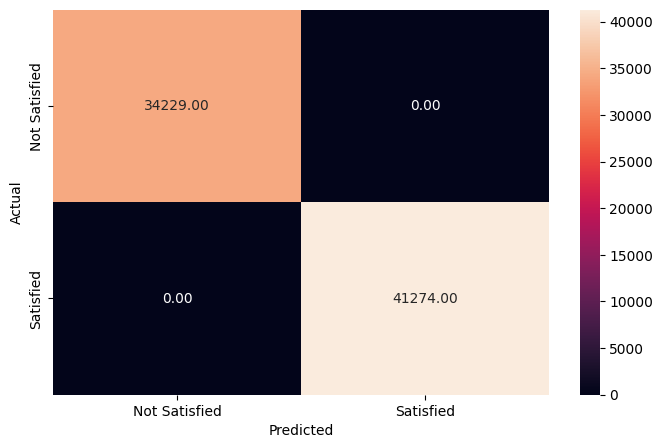

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train2)

metrics_score(y_train2, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      8557
           1       0.94      0.92      0.93     10319

    accuracy                           0.92     18876
   macro avg       0.92      0.92      0.92     18876
weighted avg       0.92      0.92      0.92     18876



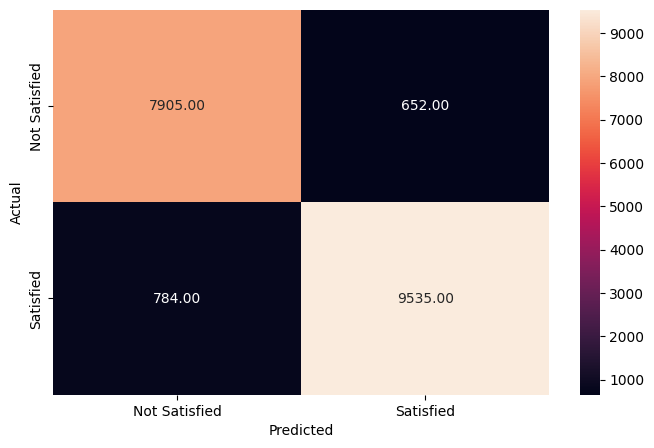

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test2)

metrics_score(y_test2, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,X_test2,y_test2)
dtree_test

,Precision,Recall,Accuracy
0,0.92,0.92,0.92


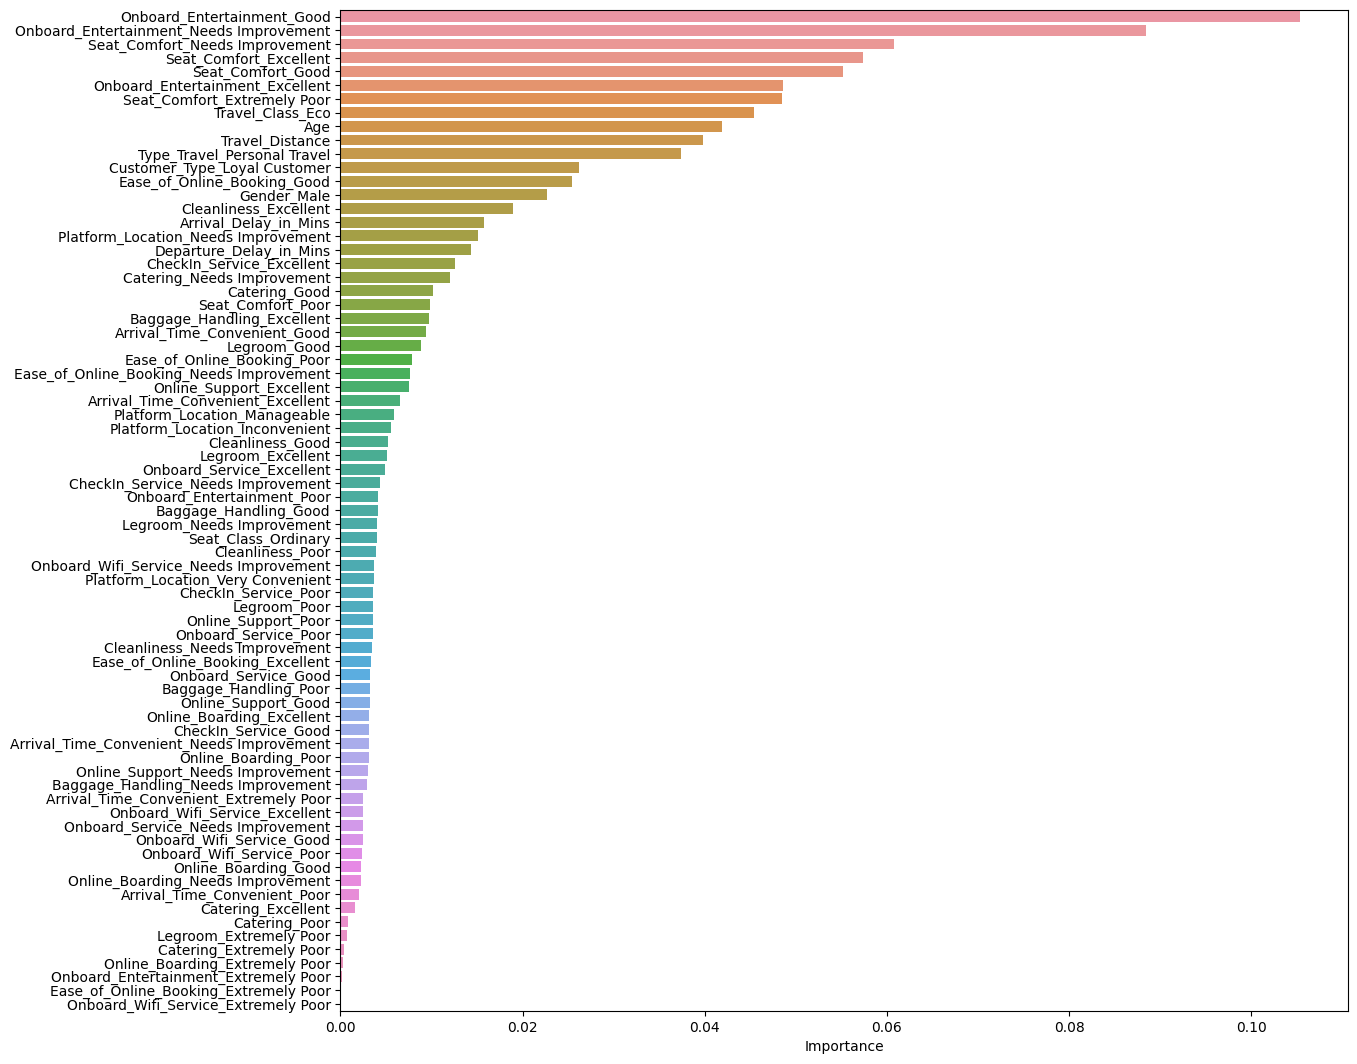

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = train_imput_dup_scaled.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=2, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     34229
           1       0.55      1.00      0.71     41274

    accuracy                           0.55     75503
   macro avg       0.27      0.50      0.35     75503
weighted avg       0.30      0.55      0.39     75503



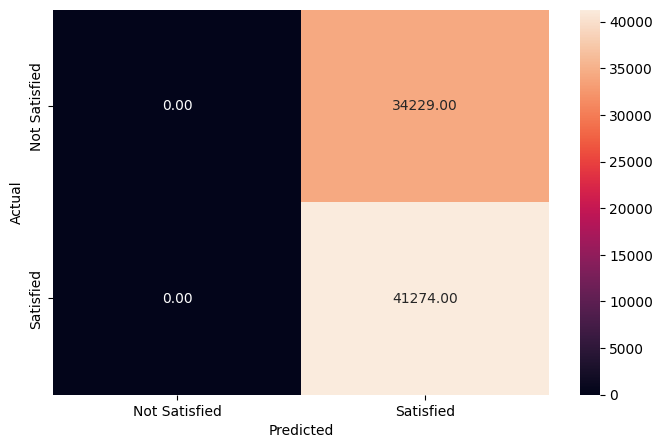

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train2)

metrics_score(y_train2, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8557
           1       0.55      1.00      0.71     10319

    accuracy                           0.55     18876
   macro avg       0.27      0.50      0.35     18876
weighted avg       0.30      0.55      0.39     18876



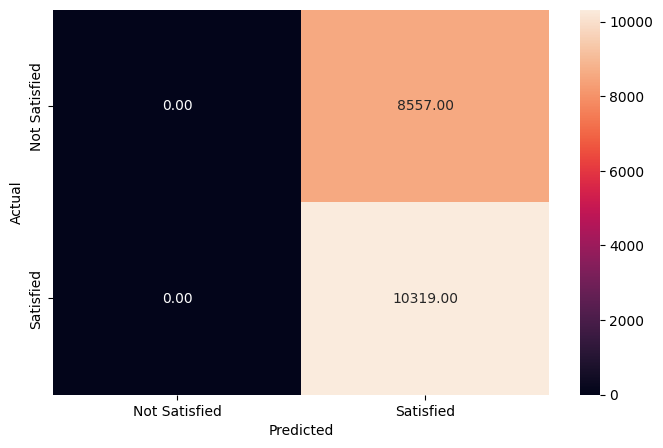

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test2)

metrics_score(y_test2, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,X_test2,y_test2)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.27,0.50,0.55


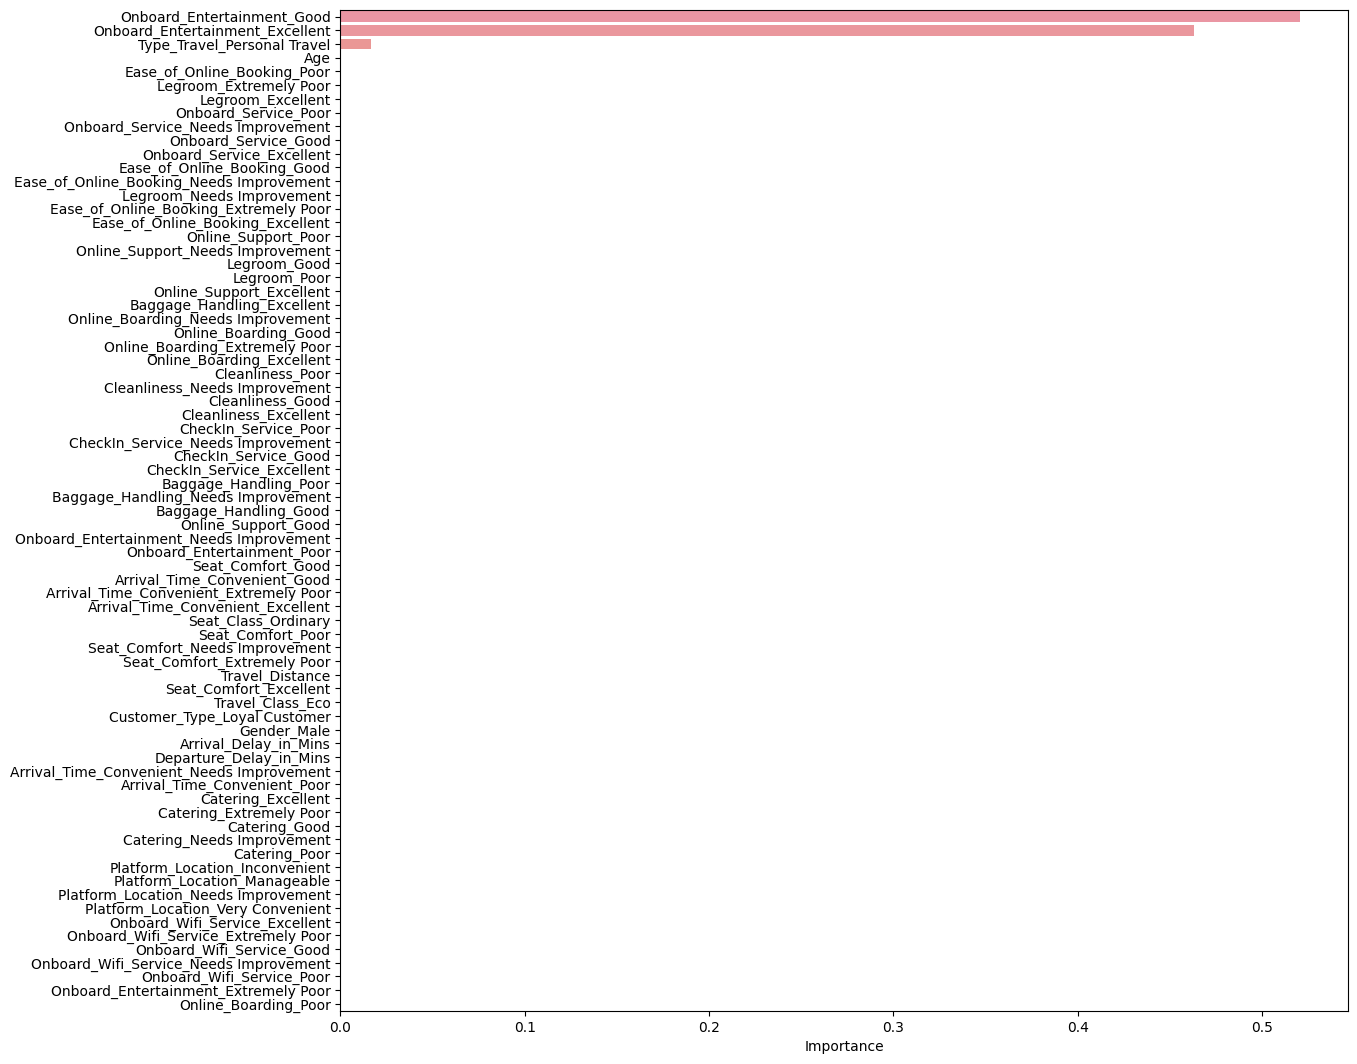

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X_train2.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

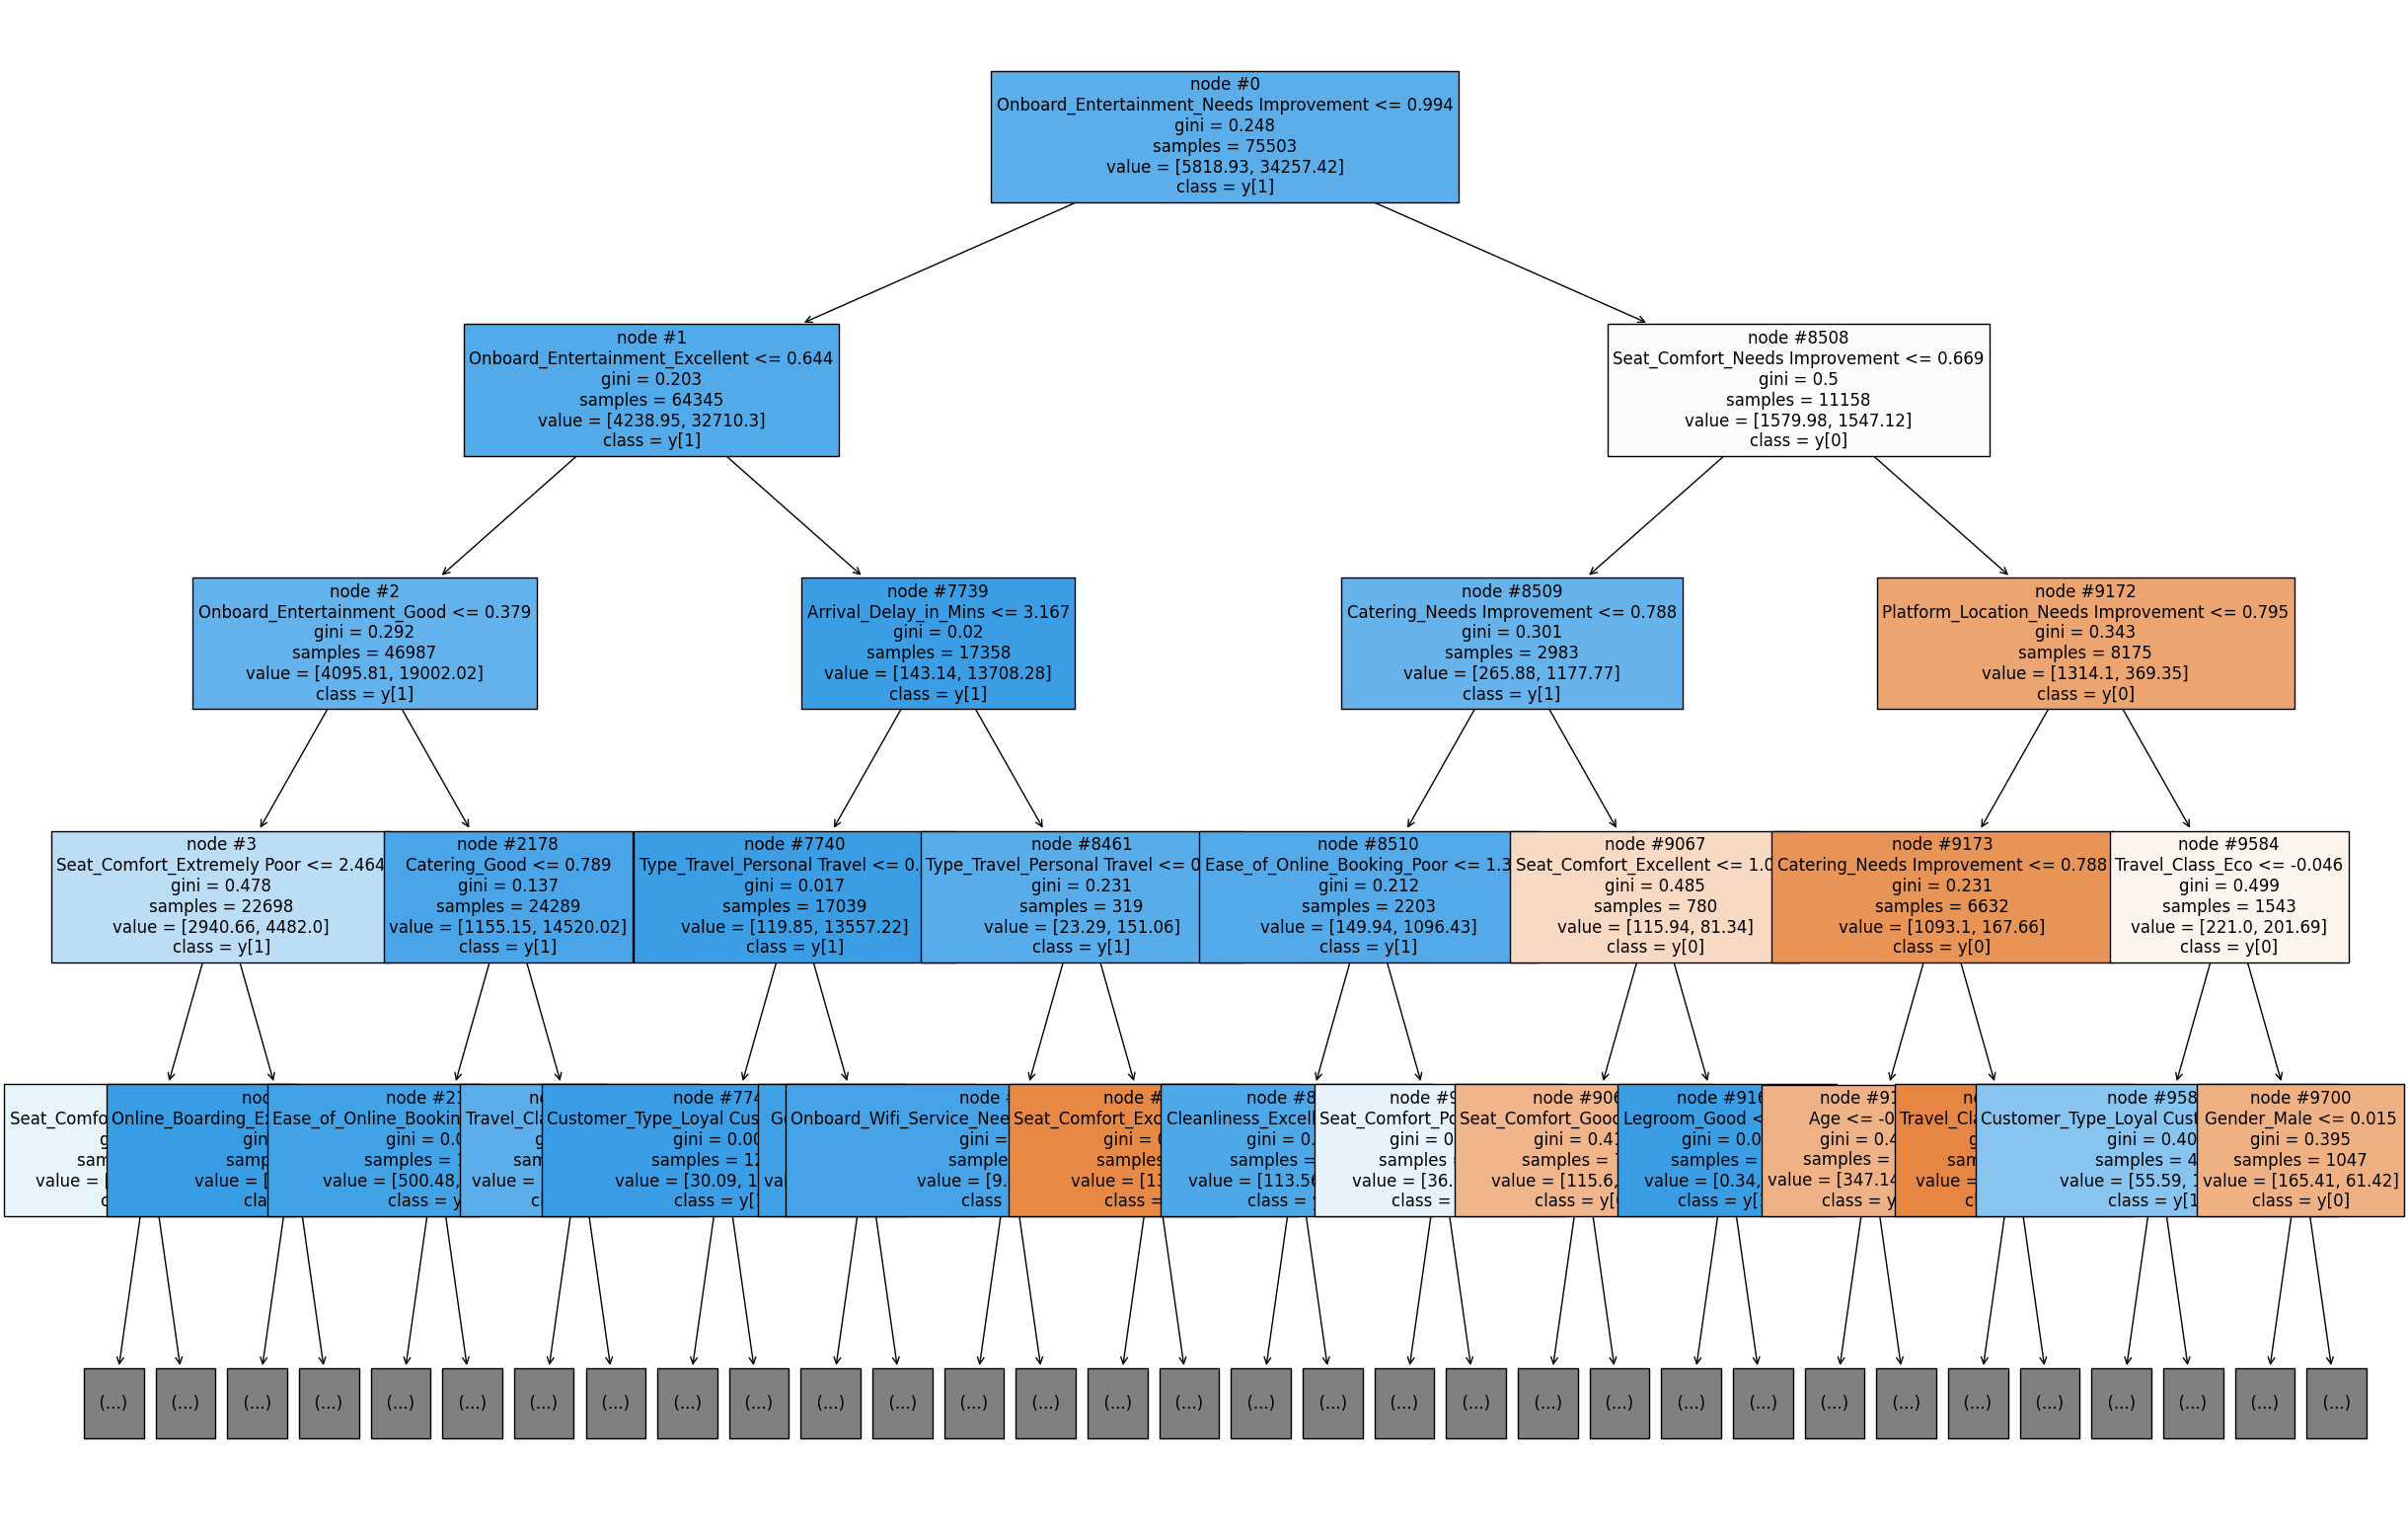

In [ ]:
features = list(X_train2.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train2, y_train2)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



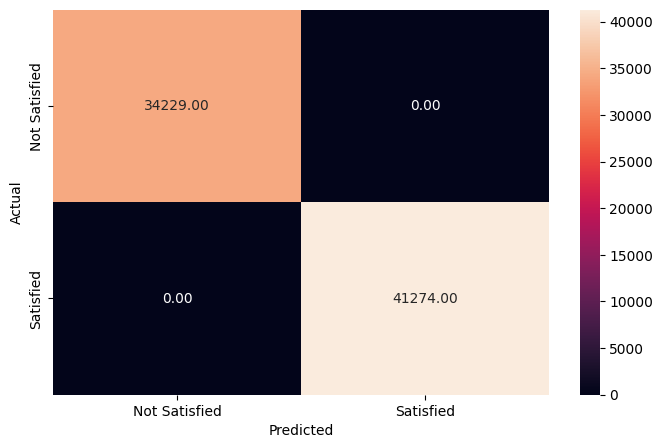

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train2)

metrics_score(y_train2, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8557
           1       0.96      0.94      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



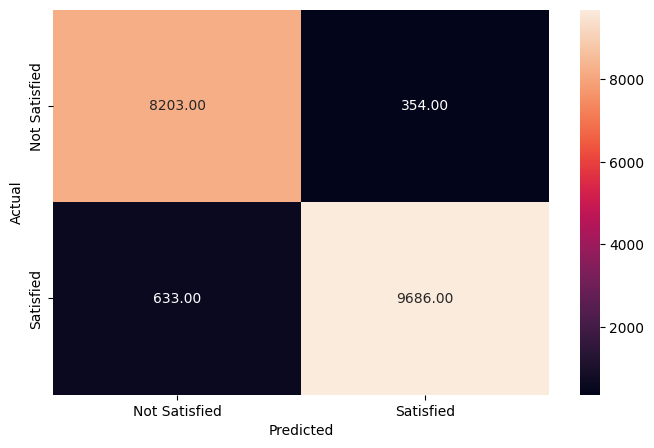

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test2)

metrics_score(y_test2, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,X_test2,y_test2)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.95,0.95,0.95


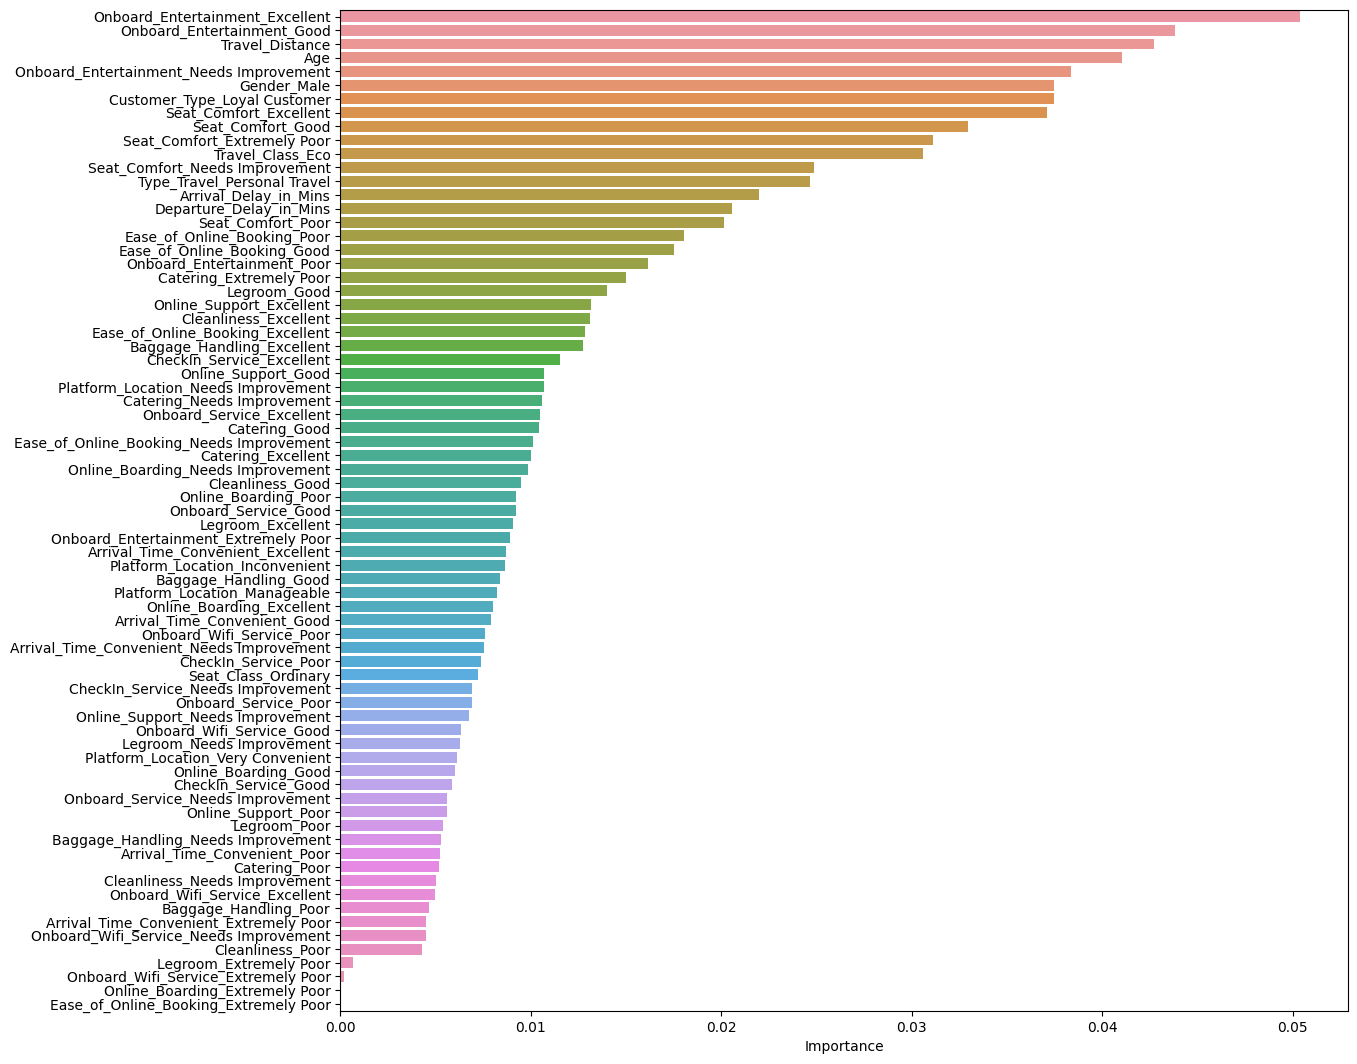

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train2.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

In [ ]:
y_pred_rf_estimator = rf_estimator.predict(test_imput_dup_scaled)
y_pred_rf_estimator

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
y_pred_rf_estimator = pd.DataFrame(y_pred_rf_estimator,columns = ['Overall_Experience'])

In [ ]:
y_pred_rf_estimator['Overall_Experience'].value_counts(normalize = True)

1   0.54
0   0.46
Name: Overall_Experience, dtype: float64

In [ ]:
output7 = test_ID.copy()

In [ ]:
output7.insert(loc=1, column='Overall_Experience', value=y_pred_rf_estimator)

In [ ]:
output7.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output7['Overall_Experience'].value_counts(normalize = True)

1   0.54
0   0.46
Name: Overall_Experience, dtype: float64

In [ ]:
output7.to_csv('/content/drive/MyDrive/DSML/Hackathon/output7.csv', encoding='utf-8', index=False)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train2, y_train2)

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train2)

metrics_score(y_train2, y_pred_train_rf_tuned)

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test2)

metrics_score(y_test2, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test2, y_test2)
rf_estimator_tuned_test

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X_train2.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train2, y_train2)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,X_test2,y_test2)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.90,0.90,0.90


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train2, y_train2)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, X_test2, y_test2)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.92,0.92,0.92


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train2,y_train2)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,X_test2,y_test2)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.95,0.95,0.95


In [ ]:
y_pred_xgb = xgb.predict(test_imput_dup_scaled)
y_pred_xgb

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_pred_xgb = pd.DataFrame(y_pred_xgb,columns = ['Overall_Experience'])

In [ ]:
y_pred_xgb['Overall_Experience'].value_counts(normalize = True)

0   0.84
1   0.16
Name: Overall_Experience, dtype: float64

In [ ]:
output6 = test_ID.copy()

In [ ]:
output6.insert(loc=1, column='Overall_Experience', value=y_pred_xgb)

In [ ]:
output6.head()

,ID,Overall_Experience
0,99900001,0
1,99900002,0
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
output6['Overall_Experience'].value_counts(normalize = True)

0   0.84
1   0.16
Name: Overall_Experience, dtype: float64

In [ ]:
output6.to_csv('/content/drive/MyDrive/DSML/Hackathon/output6.csv', encoding='utf-8', index=False)

In [ ]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],

    axis = 1,
)


models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

NameError: name 'rf_estimator_tuned_test' is not defined

In [ ]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],

    axis = 1,
)


models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",

    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [ ]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.92,0.27,0.95,0.90,0.92,0.95
Recall,0.92,0.50,0.95,0.90,0.92,0.95
Accuracy,0.92,0.55,0.95,0.90,0.92,0.95
